# Housing Price Prediction for Surprise Housing Company


## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

## Business Goal:

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Importing necessary Packages for Visualization and model building

In [1]:
# Import required libraries

# Import library to filter warning
import warnings
warnings.filterwarnings('ignore')

# Import datetime library
from datetime import date

# Import libraries for numerical and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Import libraries for scalling the independent featurs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Import libraries for model building - dataset spliting, feature selection, cross validation etc.
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Import libraries for different metrics check for model goodness
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Set max rows and columns display options
pd.set_option("display.max_rows",10000)
pd.set_option("display.max_columns",500)

# Reset matplotlib style
%matplotlib inline

### Reading input Data File

In [2]:
# Reading the input dataset

# Dataset path: G:\Advance Regression Assignment\Dataset\train.csv

surp_housing_df = pd.read_csv(r"G:\Advance Regression Assignment\Dataset\train.csv")

# Displaying top 5 rows after reading dataset
surp_housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Inspect Dataframe


#### Checking the Shape, Summary, Datatypes and Statistical information on Dataset

In [3]:
# Checking shape (number of rows and columns) of dataset

surp_housing_df.shape

(1460, 81)

- The dataset is having **`1460` rows** and **`81` columns**

In [4]:
# Checking dataset summary (null, not null, row counts, datatypes etc.)
surp_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- The dataset is having **3 float columns**, **35 integer columns** and rest 43 are **object column**
- We can see there are many columns which contains `some null values`.

In [5]:
# Checking statistical information (min, max, mean, median, percentiles etc.) of dataset

surp_housing_df.describe(percentiles = [0.05, 0.25, 0.50, 0.75, 0.95, 0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
5%,73.950000,20.000000,34.000000,3311.700000,4.000000,4.000000,1916.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,1930.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,88000.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.0000

- From the `above describe statistical information` we can see there are `some outliers present` in some columns, as ther are some **sudden jump from 99% to max value.**

### Null value and Duplicate Analysis

#### Column wise Null Value calculation

In [6]:
# checking null percentage enties in dataset columns

round((surp_housing_df.isnull().sum()/len(surp_housing_df.index))*100,3).sort_values(ascending=False)

PoolQC           99.521
MiscFeature      96.301
Alley            93.767
Fence            80.753
FireplaceQu      47.260
LotFrontage      17.740
GarageCond        5.548
GarageType        5.548
GarageYrBlt       5.548
GarageFinish      5.548
GarageQual        5.548
BsmtExposure      2.603
BsmtFinType2      2.603
BsmtFinType1      2.534
BsmtCond          2.534
BsmtQual          2.534
MasVnrArea        0.548
MasVnrType        0.548
Electrical        0.068
Utilities         0.000
YearRemodAdd      0.000
MSSubClass        0.000
Foundation        0.000
ExterCond         0.000
ExterQual         0.000
Exterior2nd       0.000
Exterior1st       0.000
RoofMatl          0.000
RoofStyle         0.000
YearBuilt         0.000
LotConfig         0.000
OverallCond       0.000
OverallQual       0.000
HouseStyle        0.000
BldgType          0.000
Condition2        0.000
BsmtFinSF1        0.000
MSZoning          0.000
LotArea           0.000
Street            0.000
Condition1        0.000
Neighborhood    

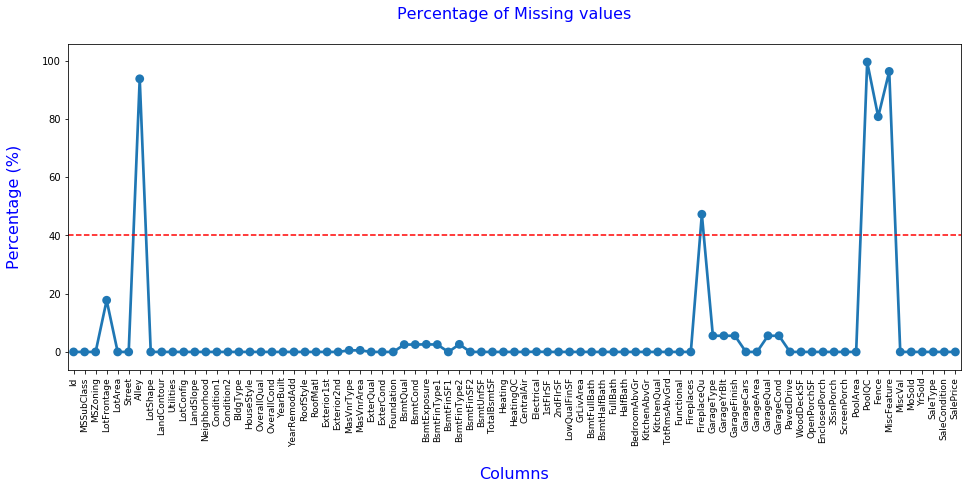

In [7]:
# Point Plot


# Setting the figure size for Point plot
plt.figure(figsize = (16,6))

# Point plot using seaborn
ax = sns.pointplot(surp_housing_df.columns
                   , round((surp_housing_df.isnull().sum()/len(surp_housing_df.index))*100,3))

# Setting horizontal line at 45% 
ax.axhline(40, ls = '--', color = 'red')

# Setting X- axis and Y- axix display size
plt.xticks(rotation =90,fontsize =9)

# Setting title for the plot
plt.title("Percentage of Missing values", fontsize = 16, color = 'blue', pad = 25)

# Setting axis labels
plt.ylabel("Percentage (%)",fontsize = 16, color = 'blue', labelpad = 20)
plt.xlabel("Columns",fontsize = 16, color = 'blue', labelpad = 20)

# Displaying the plot using matplotlib.pyplot show() function
plt.show()

In [8]:
# Checking Total number of rows with more than 50% null values

row_wise_null_count = len(surp_housing_df[round(100*(surp_housing_df.isnull().sum(axis = 1)/surp_housing_df.shape[1]),2)>50.00])

print( 'Number of rows with more than 50% null values : ', row_wise_null_count)

Number of rows with more than 50% null values :  0


#### Inference:

- There are `19 columns with null values`. `5 columns have more than 40% NaN (null values)` which we should drop as imputing these columns will introduce bias. 

- No rows present which have `more than 50% null values`.

### Duplicate Analysis:

In [9]:
# Duplicate analysis on 'Unique Identifier' columns

dup_on_unique_col = surp_housing_df.duplicated(subset='Id').sum()

print('Number of duplicate entries on Id column: ',dup_on_unique_col)

Number of duplicate entries on Id column:  0


#### Inference:
    
- `Id` is a unique identifier column and hence we don't need prediction for it.
- There are `no duplicate values present based on ID column`.

## Data Cleaning


- **Delete High Null Columns:** Dropping columns which are having more than 40% missing values
- **Missing Value Treatement:** Treaing missing values by imputing for columns with missing values less than or equal to 40%
    - For the numerical columns, imputing with `mean` value, if `no outliers` present
    - If `outlier exists`, we will impute those number columns with `median`
    - For categorical columns, `dropping highly skwed` columns
    - For meaning full missing, creating `new category` for imputing missing value
    - Also, for some column like `MasVnrType` and `Electrical` are imputed with `mode` values

#### Delete High Null Columns

In [10]:
# Dropping Columns with high missing values ,above 40%

cols_with_40null = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
surp_housing_df.drop(cols_with_40null, axis=1, inplace=True)

#### Inference:

- We have suceessfully `deleted 5 columns` where the columns had high null values

In [11]:
# Checking shape of the DataFrame after dropping columns with null above 40%

surp_housing_df.shape

(1460, 76)

- There are `76 columns` exist after deleting high null value columns

In [12]:
# checking null percentage enties in dataset columns after dropping columns with 40% null value

round((surp_housing_df.isnull().sum()/len(surp_housing_df.index))*100,3).sort_values(ascending=False)

LotFrontage      17.740
GarageFinish      5.548
GarageType        5.548
GarageCond        5.548
GarageQual        5.548
GarageYrBlt       5.548
BsmtExposure      2.603
BsmtFinType2      2.603
BsmtFinType1      2.534
BsmtCond          2.534
BsmtQual          2.534
MasVnrType        0.548
MasVnrArea        0.548
Electrical        0.068
RoofStyle         0.000
RoofMatl          0.000
SalePrice         0.000
Exterior1st       0.000
Exterior2nd       0.000
YearBuilt         0.000
ExterQual         0.000
ExterCond         0.000
Foundation        0.000
YearRemodAdd      0.000
BldgType          0.000
OverallCond       0.000
OverallQual       0.000
HouseStyle        0.000
Condition2        0.000
Condition1        0.000
Neighborhood      0.000
LandSlope         0.000
LotConfig         0.000
Utilities         0.000
LandContour       0.000
LotShape          0.000
Street            0.000
LotArea           0.000
MSZoning          0.000
MSSubClass        0.000
BsmtFinSF1        0.000
TotalBsmtSF     

#### Inference:

- There are still 14 column exist with less than or equal to 40% missing values, which we are imputing in below

#### Segregating Categorical & Numerical Values

In [13]:
# Segregating Categorical & Numerical Values

# Creating a list of categorical columns
categorical_col = surp_housing_df.select_dtypes(exclude =["number"]).columns.values

# Creating a list of numerical columns
numerical_col = surp_housing_df.select_dtypes(include =["number"]).columns.values

# Printing the list of columns of each datatype
print("Categorical Features : \n {} \n\n".format(categorical_col))
print("Numerical Features : \n {} ".format(numerical_col))

Categorical Features : 
 ['MSZoning' 'Street' 'LotShape' 'LandContour' 'Utilities' 'LotConfig'
 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2' 'BldgType'
 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'GarageType'
 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive' 'SaleType'
 'SaleCondition'] 


Numerical Features : 
 ['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal'

### Treating missing values

- Imputing for columns with missing values less than or equal to 40% by grouping numerical and categorical columns

In [14]:
# Identifying numerical columns with null values

numerical_null_cols = round(((surp_housing_df[numerical_col].isnull().sum()/
                              len(surp_housing_df.index))*100),3).sort_values(ascending = False)

# Displaying numerical columns with null percentage (%)
numerical_null_cols[numerical_null_cols>0]

LotFrontage    17.740
GarageYrBlt     5.548
MasVnrArea      0.548
dtype: float64

#### Inference:
- There are three numerical columns `LotFrontage`, `GarageYrBlt` and `MasVnrArea` with approx. 17%, 5% and 0.5% misssing values, which will be imputed with `mean` or `median` values

#### Numerical Columns Null Value Treatment:

In [15]:
# Custom function for box plot and dist plot of numerical columns

# Function Input: DataFrame, Column name
# Function Output: Returns None

def box_dist_plot_func(df, col):
    
    # Setting figure size
    plt.figure(figsize = (12,6))
    
    # Setting subplot coordinate
    plt.subplot(1,2,1)
    
    # Setting axis label and display parameters
    plt.xlabel(col,fontsize = 16, color = 'blue', labelpad = 20)
    
    # Plotting distribution plot using seaborn library
    sns.distplot(df[col])
    
    # Setting subplot coordinate
    plt.subplot(1,2,2)
    
    # Plotting box plot using seaborn library
    sns.boxplot(df[col])
    
    # Setting axis label and display parameters
    plt.xlabel(col,fontsize = 16, color = 'blue', labelpad = 20)
    
    # Showing the plot using matplotlib.pyplot show() function 
    plt.show()

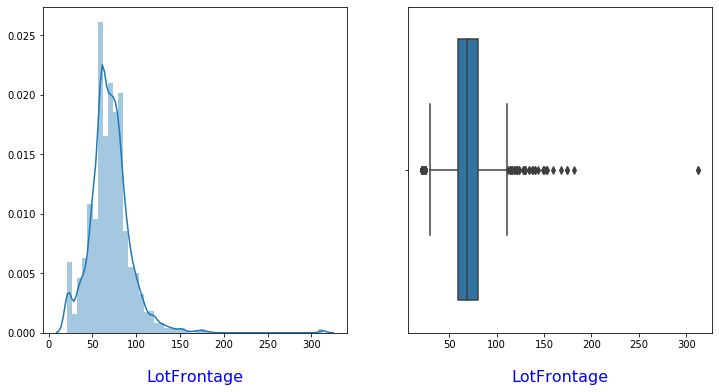

In [16]:
# Calling custom function for distribution plot and box plot of numerical column 'LotFrontage'

box_dist_plot_func(surp_housing_df, 'LotFrontage')

#### Inference:

- From the above box plot we can see a presence of outlier 
- The distribution plot shows that the data is right skewed.
- So imputing the missing values through `median`

In [17]:
# Imputing the missing values through median for column 'LotFrontage'

surp_housing_df['LotFrontage']= surp_housing_df.LotFrontage.fillna(surp_housing_df.LotFrontage.median())

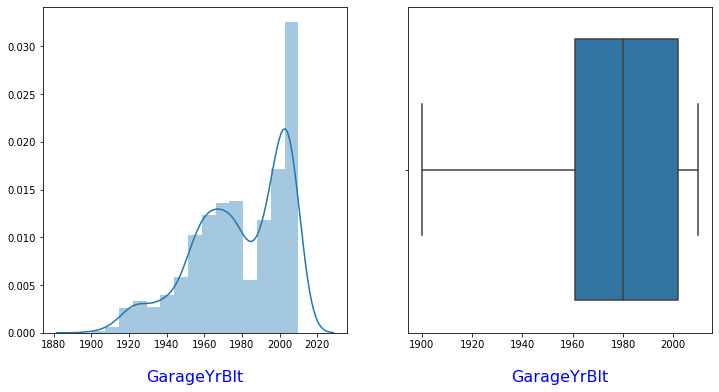

In [18]:
# Calling custom function for distribution plot and box plot of numerical column 'GarageYrBlt'

box_dist_plot_func(surp_housing_df, 'GarageYrBlt')

#### Inference:

- The above box plot shows no presence of outlier for the **GarageYrBlt** column
- The distribution plot shows that the data is not much skewed.
- Hence, we can use `mean` for imputation

In [19]:
# Imputing the missing values through mean for column 'GarageYrBlt'

surp_housing_df['GarageYrBlt']= surp_housing_df.GarageYrBlt.fillna(surp_housing_df.GarageYrBlt.mean()) 

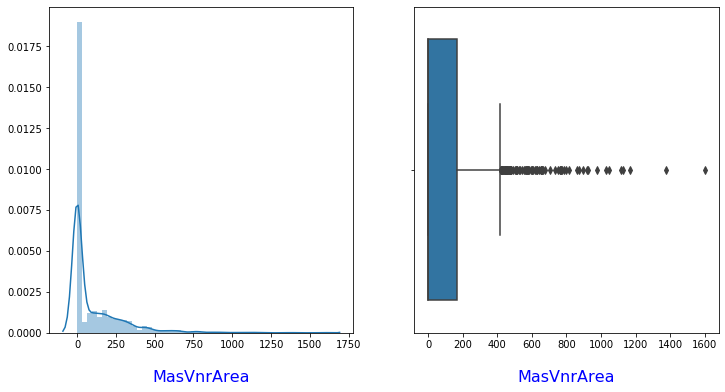

In [20]:
# Calling custom function for distribution plot and box plot of numerical column 'MasVnrArea'

box_dist_plot_func(surp_housing_df, 'MasVnrArea')

#### Inference:

- From the above box plot we can see a presence of outlier for column **MasVnrArea**
- The distribution plot shows that the data is right skewed.
- So imputing the missing values through `median`

In [21]:
# Imputing the missing values through mean for column 'MasVnrArea'

surp_housing_df['MasVnrArea']= surp_housing_df.MasVnrArea.fillna(surp_housing_df.MasVnrArea.median())

In [22]:
# Checking numerical columns for null values after imputation

numerical_null_cols = round(((surp_housing_df[numerical_col].isnull().sum()/
                              len(surp_housing_df.index))*100),3).sort_values(ascending = False)

# Displaying numerical columns with null percentage (%)
len(numerical_null_cols[numerical_null_cols>0])

0

#### Inference:

- We can see zero null values present in numerical columns after missing value imputation performed

#### Categorical Columns Null Value Treatment:

In [23]:
# Checking categorical columns for null values imputation

categorical_null_col = round(((surp_housing_df[categorical_col].isnull().sum()/
                              len(surp_housing_df.index))*100),3).sort_values(ascending = False)

# Displaying categorical columns with null percentage (%)
categorical_null_cols = categorical_null_col[categorical_null_col>0]

print(categorical_null_cols)

GarageCond      5.548
GarageQual      5.548
GarageFinish    5.548
GarageType      5.548
BsmtFinType2    2.603
BsmtExposure    2.603
BsmtCond        2.534
BsmtQual        2.534
BsmtFinType1    2.534
MasVnrType      0.548
Electrical      0.068
dtype: float64


#### Inference:

- There are 11 categorical column exist in dataset, having missing values, which will be either imputed or dropped based on skewness analysis

In [24]:
# Custom function for plotting count plot for categorical columns

# Function Input: DataFrame , column list
# Function Output: Returns None


def value_count_plot (df,column):
    
    # Setting the figure size for countplot
    plt.figure(figsize = (20,35))
    
    # Loop through each categorical columns having null values
    for col in enumerate(list(column)):
        
        # Setting subplot co-ordinates
        plt.subplot(4,3,col[0]+1)
        
        # Plotting count plot using seaborn
        sns.countplot(df[col[1]], palette = 'Set2')

        # Setting X- axis and Y- axix display size
        plt.xticks(fontsize = 8, rotation = 90)
        
        # Setting axis labels
        plt.ylabel("Count",fontsize = 16, color = 'blue', labelpad = 10)
        plt.xlabel(col[1].title(),fontsize = 16, color = 'blue', labelpad = 5)
    
# Displaying the plot using matplotlib.pyplot show() function
plt.show()

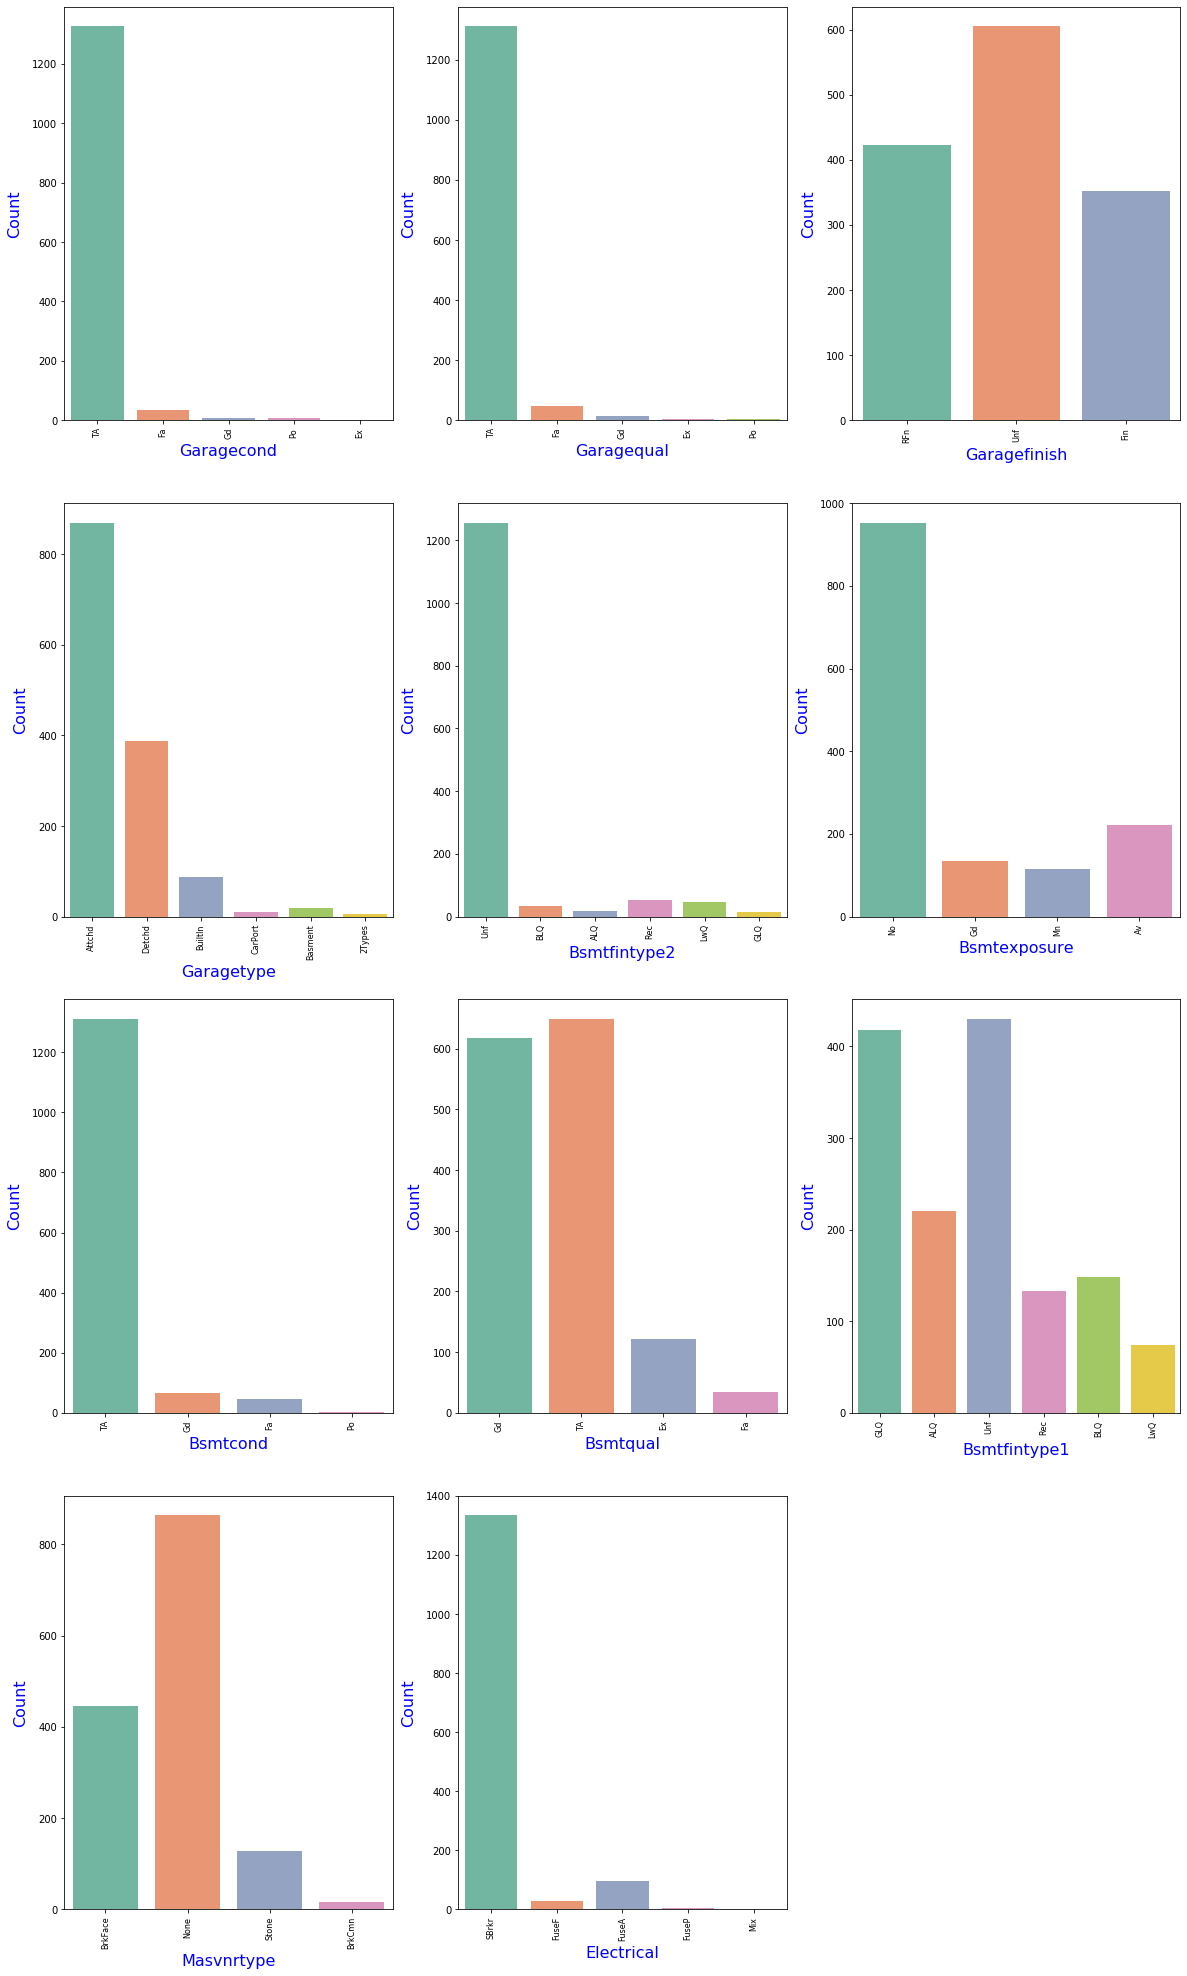

In [25]:
# Calling custom function for plotting categorical variables

value_count_plot(surp_housing_df, categorical_null_cols.index)

#### Inference:

- From the above plot on categorical columns, we can identify mode values, which will be used for imputation.




- Column `MasVnrType` and `Electrical` are imputed with mode value




- Below columns are having meaningful missing values hence, imputing with new category.
    - `GarageType`, `GarageFinish`, `GarageCond`, `GarageQual` columns are having NA values when the house does not have the garrage. Hence, replacing null with `No Garrage`
    - `BsmtExposure`,`BsmtFinType2`,`BsmtFinType1`,`BsmtCond`,`BsmtQual` columns are having NA when the house does not have the basement. Hence, replacing null with `No Basement`


In [26]:
# Replacing null with No Garrage, when the house doesn't have the garrage
surp_housing_df['GarageType'] = surp_housing_df['GarageType'].fillna('No Garage')
surp_housing_df['GarageFinish'] = surp_housing_df['GarageFinish'].fillna('No Garage')
surp_housing_df['GarageCond'] = surp_housing_df['GarageCond'].fillna('No Garage')
surp_housing_df['GarageQual'] = surp_housing_df['GarageQual'].fillna('No Garage')

# Replacing null with mode value 
surp_housing_df['MasVnrType'] = surp_housing_df['MasVnrType'].fillna(surp_housing_df['MasVnrType'].mode()[0])
surp_housing_df['Electrical'] = surp_housing_df['Electrical'].fillna(surp_housing_df['Electrical'].mode()[0])

# Replacing null with No Basement, when the house doesn't have the basement
surp_housing_df['BsmtExposure'] = surp_housing_df['BsmtExposure'].fillna('No Basement')
surp_housing_df['BsmtFinType2'] = surp_housing_df['BsmtFinType2'].fillna('No Basement')
surp_housing_df['BsmtFinType1'] = surp_housing_df['BsmtFinType1'].fillna('No Basement')
surp_housing_df['BsmtCond'] = surp_housing_df['BsmtCond'].fillna('No Basement')
surp_housing_df['BsmtQual'] = surp_housing_df['BsmtQual'].fillna('No Basement')

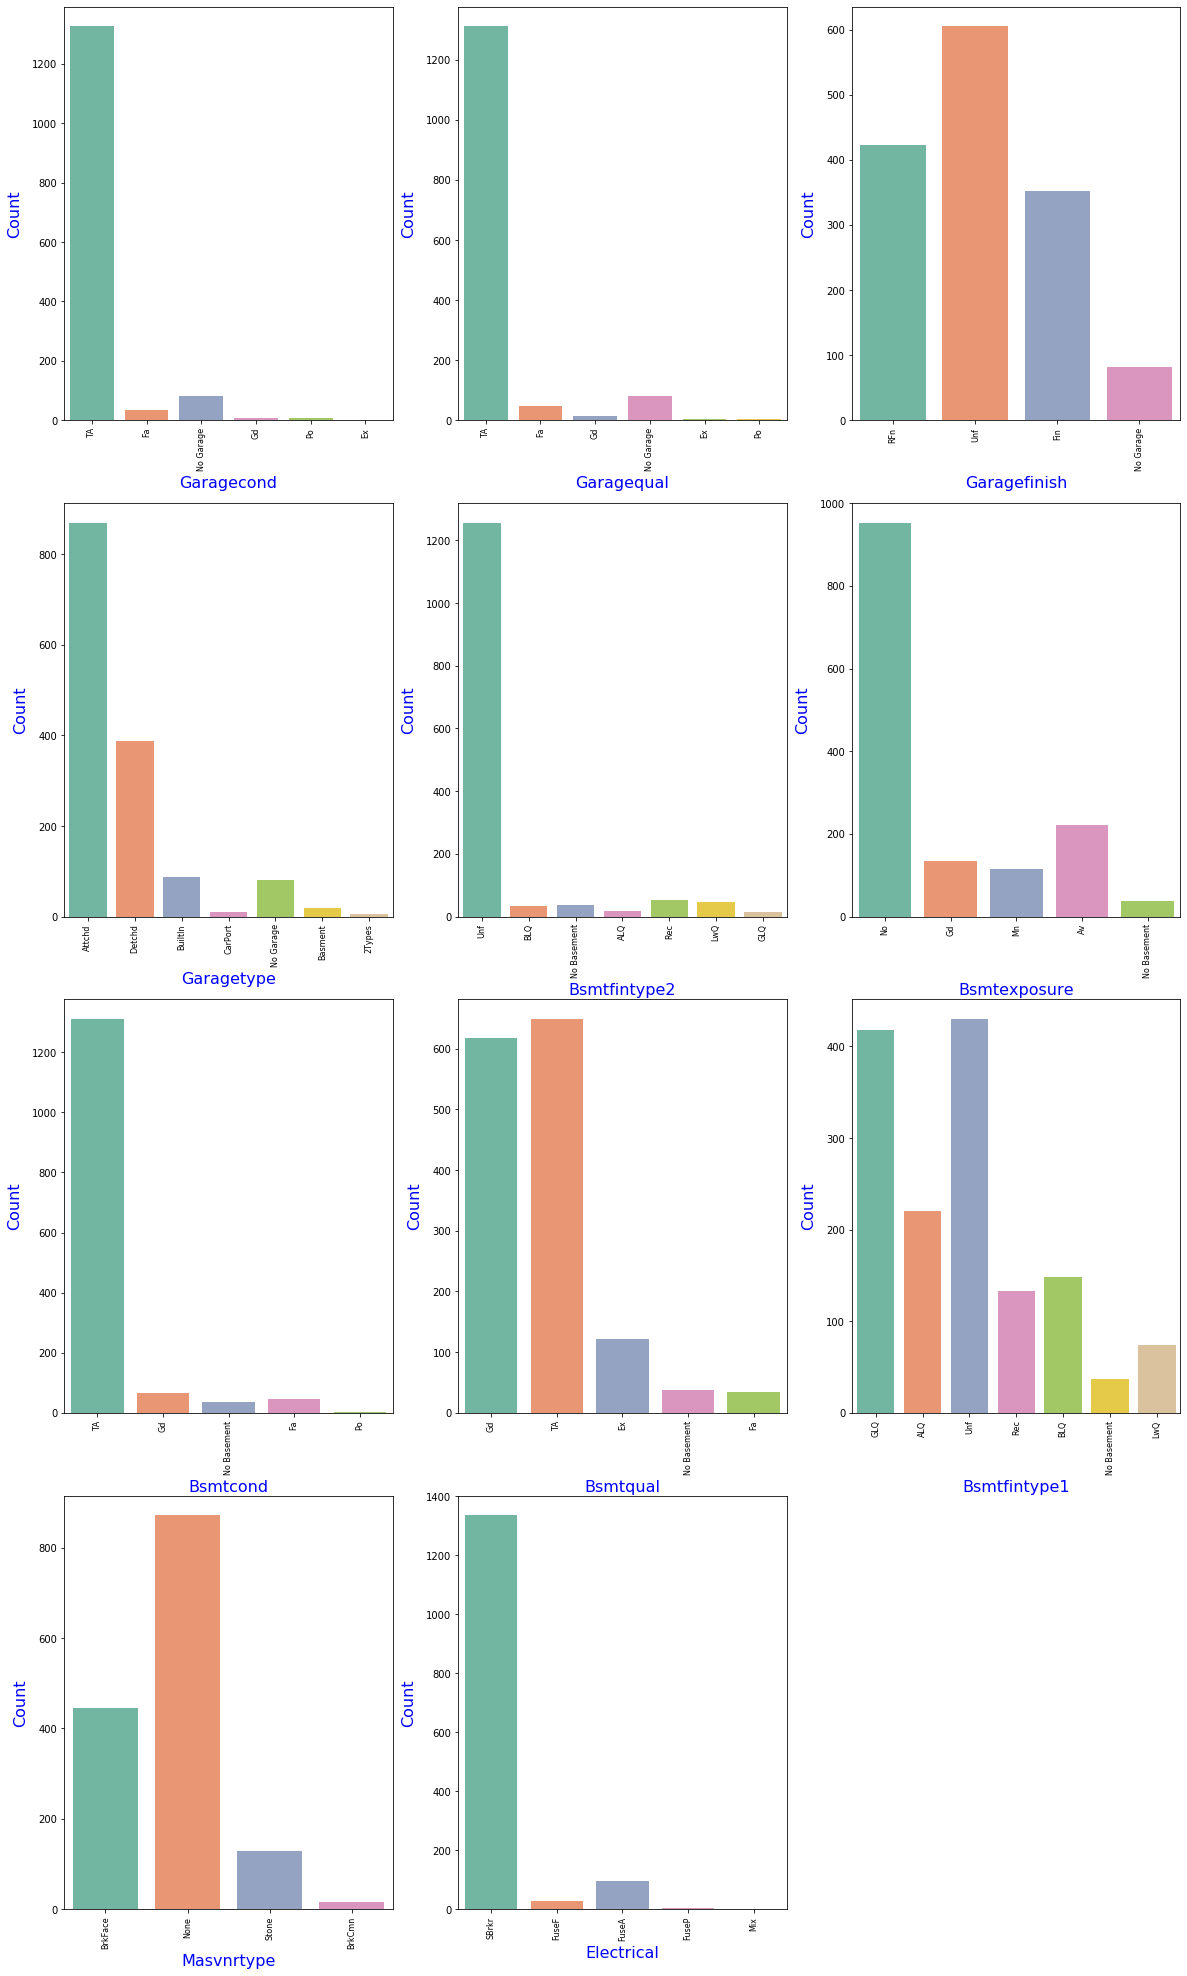

In [27]:
# Calling custom function for plotting categorical variables

value_count_plot(surp_housing_df, categorical_null_cols.index)

#### Inference:



- From the above plot we can see, new category `No Garrage` has been displayed for columns `GarageType`, `GarageFinish`, `GarageCond`, `GarageQual` 



- Similarly, new category `No Basement` has been displayed for columns `BsmtExposure`,`BsmtFinType2`,
`BsmtFinType1`,`BsmtCond`,`BsmtQual`

In [28]:
# Checking numerical columns for null values after imputation

categorical_null_col = round(((surp_housing_df[categorical_col].isnull().sum()/
                              len(surp_housing_df.index))*100),3).sort_values(ascending = False)

# Displaying numerical columns with null percentage (%)
categorical_null_cols = categorical_null_col[categorical_null_col>0]

# Printing number of categorical column exists with null entries
print(len(categorical_null_cols))

0


#### Inference:

- We can see zero null values present in categorical columns after missing value imputation

### Numerical to categorical conversion

In [29]:
# Converting numerical column to categorical so that dummy variables can be created

surp_housing_df['MSSubClass']=surp_housing_df['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

surp_housing_df['OverallQual']=surp_housing_df['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

surp_housing_df['OverallCond']=surp_housing_df['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [30]:
# Displaying the dataset after numerical to categorical conversion of 'MSSubClass', 'OverallQual' & 'OverallCond'

surp_housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [31]:
# Checking datatypes after converting few columns

surp_housing_df.dtypes

Id                 int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual       object
OverallCond       object
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


#### Inference:

- From above, we can see datatype of columns `MSSubClass`, `OverallQual` and `OverallCond` have been converted into `object`

## Exploratory Data Analysis (EDA)

- Univariate Analysis
- Bivariate Analysis

## Univariate Analysis - Categorical Variables

In [32]:
# Custom function for Univariate Analysis on categorical columns

# Function Input: DataFrame , column list
# Function Output: Returns None


def univariate_cate_func (df,column):
    
    # Setting the figure size for countplot
    plt.figure(figsize = (22,22))
    
    # Loop through each categorical columns having null values
    for col in enumerate(list(column)):
        
        # Setting subplot co-ordinates
        plt.subplot(2,3,col[0]+1)
        
        # Plotting count plot using seaborn
        sns.countplot(df[col[1]], palette = 'Set2')

        # Setting X- axis and Y- axix display size
        plt.xticks(fontsize = 10, rotation = 90)
        
        # Setting axis labels
        plt.ylabel("Count",fontsize = 16, color = 'blue', labelpad = 10)
        plt.xlabel(col[1].title(),fontsize = 16, color = 'blue', labelpad = 5)
    
# Displaying the plot using matplotlib.pyplot show() function
plt.show()

In [33]:
# Getting list of categorical columns

Cat_cols = surp_housing_df.select_dtypes(include=['object'])

# Dislaying list of categorical column names
Cat_cols.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

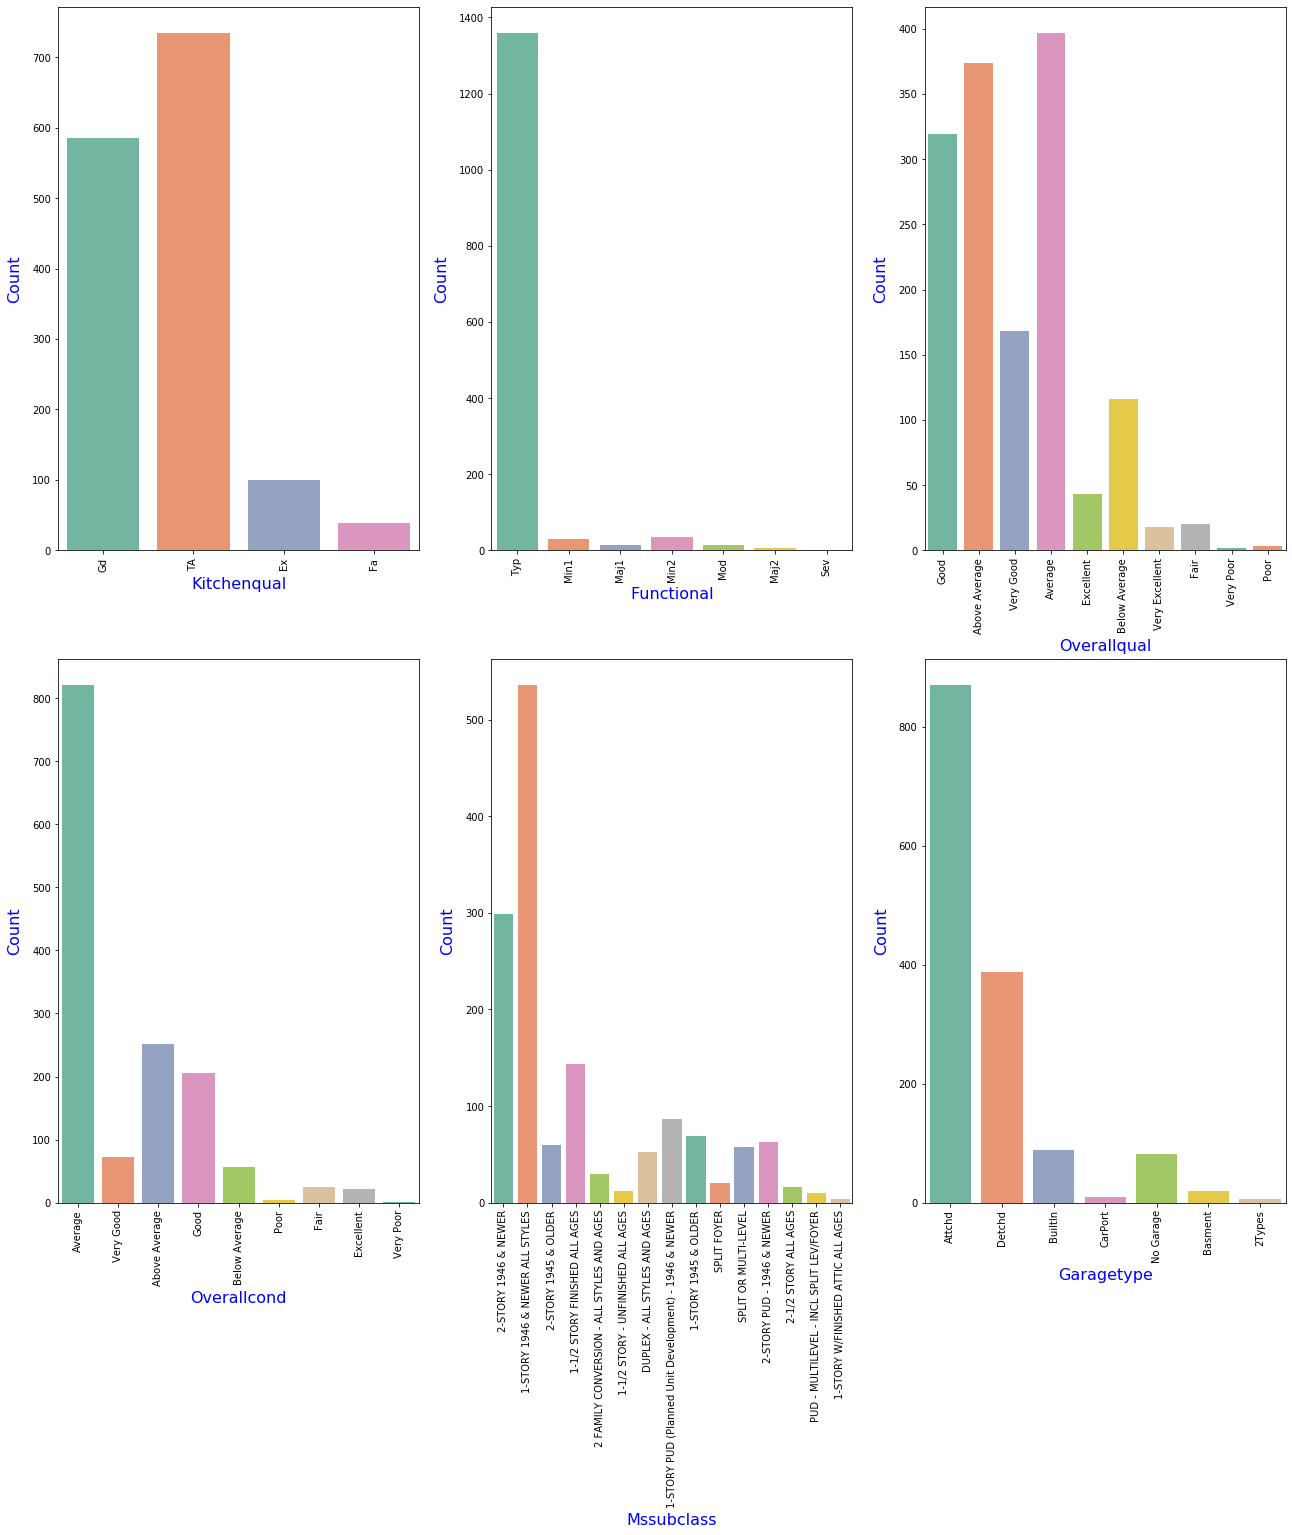

In [34]:
# Performing Univariate analysis

# Randomly making groups of six colums
col_names = ['KitchenQual', 'Functional', 'OverallQual', 'OverallCond', 'MSSubClass', 'GarageType']


# Calling custom function for univariate analysis
univariate_cate_func(surp_housing_df ,col_names)

#### Inference:


- From the above count plot, we can see column `Functional` is highly skewed. That means most of the information is stored in one category and hence, this column will not help us for prediction of SalesPrice. Therefore, we are dropping this column
- We can also see that `GarageType` column is having very low count for `Basment`, `CarPort`, `2Types`  categories. Hence, grouping them into a new category `Others`

In [35]:
# Dropping highly skewed categorical column 'Functional'

surp_housing_df.drop(['Functional'], axis=1, inplace=True)

In [36]:
# Grouping 'Basment','CarPort','2Types' types as 'Others' in 'GarageType' column

surp_housing_df['GarageType'] = surp_housing_df['GarageType'].replace(['Basment','CarPort','2Types'],'Others')

In [37]:
# Checking entries in GarageType column after grouping few values

surp_housing_df['GarageType'].value_counts(normalize = True)*100

Attchd       59.589041
Detchd       26.506849
BuiltIn       6.027397
No Garage     5.547945
Others        2.328767
Name: GarageType, dtype: float64

#### Inference:


- Above value count shows new category `Others` has been addedd in column `GarageType` and `Basment`, `CarPort`, `2Types` etc. categories are no more exist

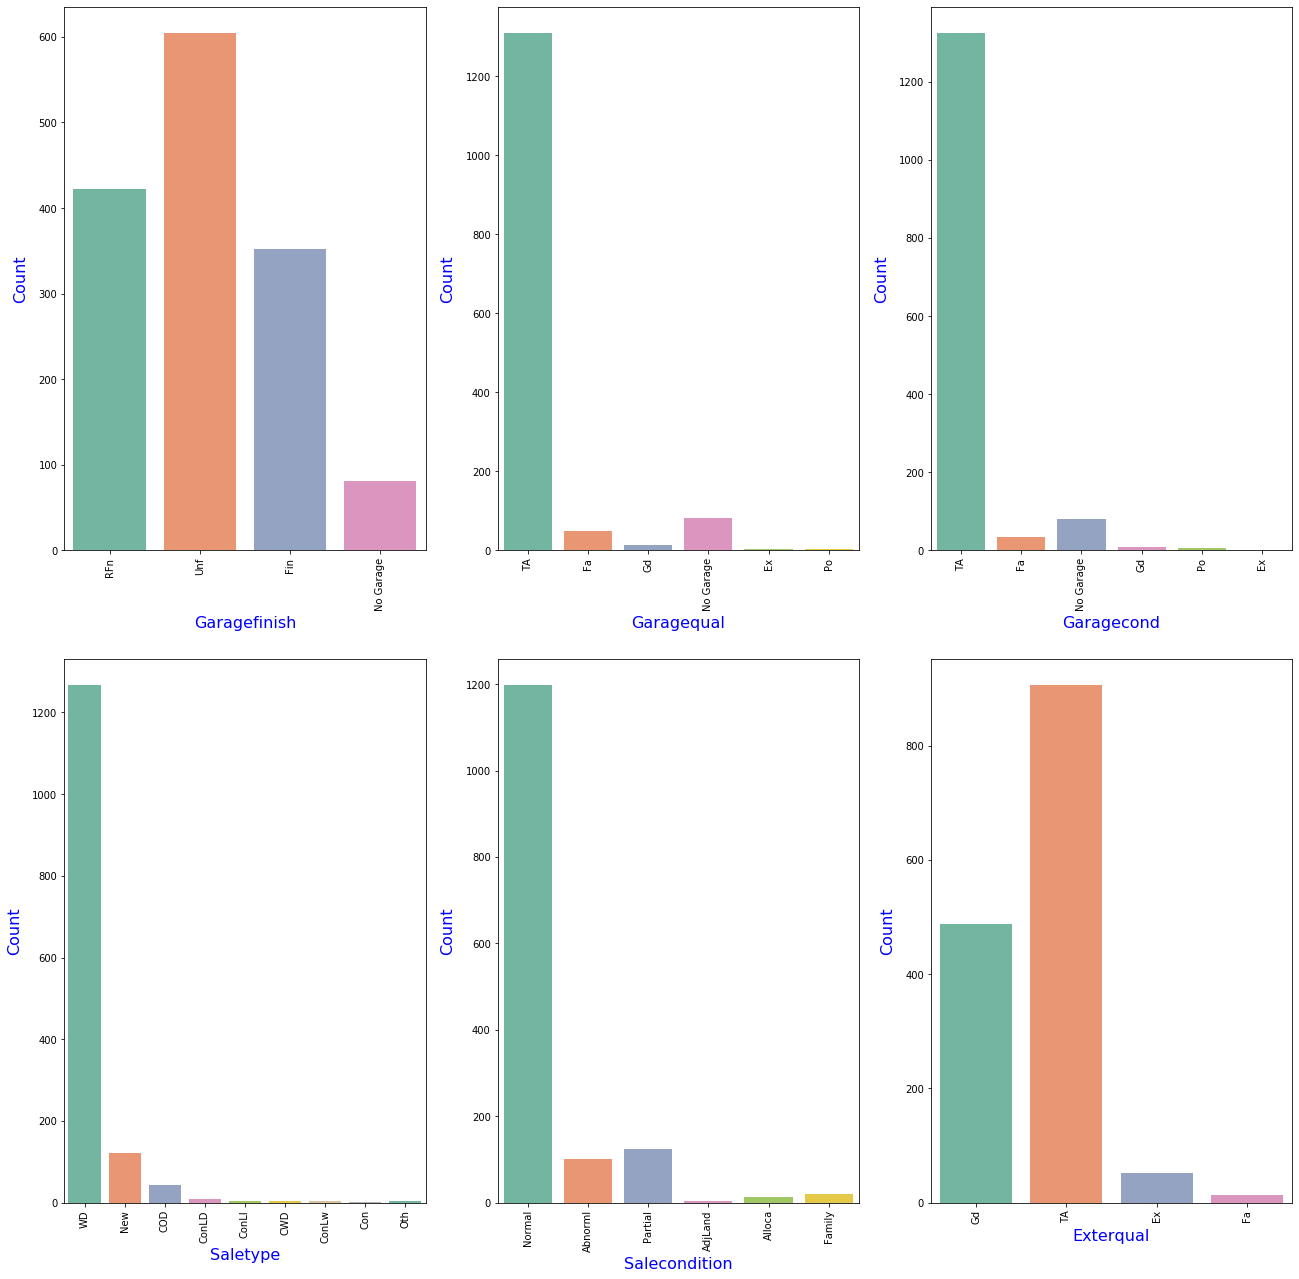

In [38]:
# Performing Univariate analysis

# Randomly making groups of another six colums
col_names = ['GarageFinish', 'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition', 'ExterQual']


# Calling custom function for univariate analysis
univariate_cate_func(surp_housing_df ,col_names)

#### Inference:


- From the above count plot, we can see columns `GarageQual`,`GarageCond` and `SaleType` are highly skewed. That means most of the information is stored in one category and hence, this column will not help us for prediction of SalesPrice. Therefore, we are dropping these columns
- We can also see that `SaleCondition` column is having very low count for `Family`,`Alloca`,`AdjLand`  categories. Hence, grouping them into a new category `Others`

In [39]:
# Grouping 'Family','Alloca','AdjLand' as 'Others' in 'SaleCondition' column

surp_housing_df['SaleCondition'] = surp_housing_df['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')

In [40]:
# Checking entries in SaleCondition column after grouping few values

surp_housing_df['SaleCondition'].value_counts(normalize = True)*100

Normal     82.054795
Partial     8.561644
Abnorml     6.917808
Others      2.465753
Name: SaleCondition, dtype: float64

#### Inference:


- Above value count shows new category `Others` has been addedd in column `SaleCondition` and `Family`,`Alloca`,`AdjLand` etc. categories are no more exist

In [41]:
# Dropping highly skewed columns 'GarageQual','GarageCond' and 'SaleType'

surp_housing_df.drop(['GarageQual','GarageCond','SaleType'], axis=1, inplace=True)

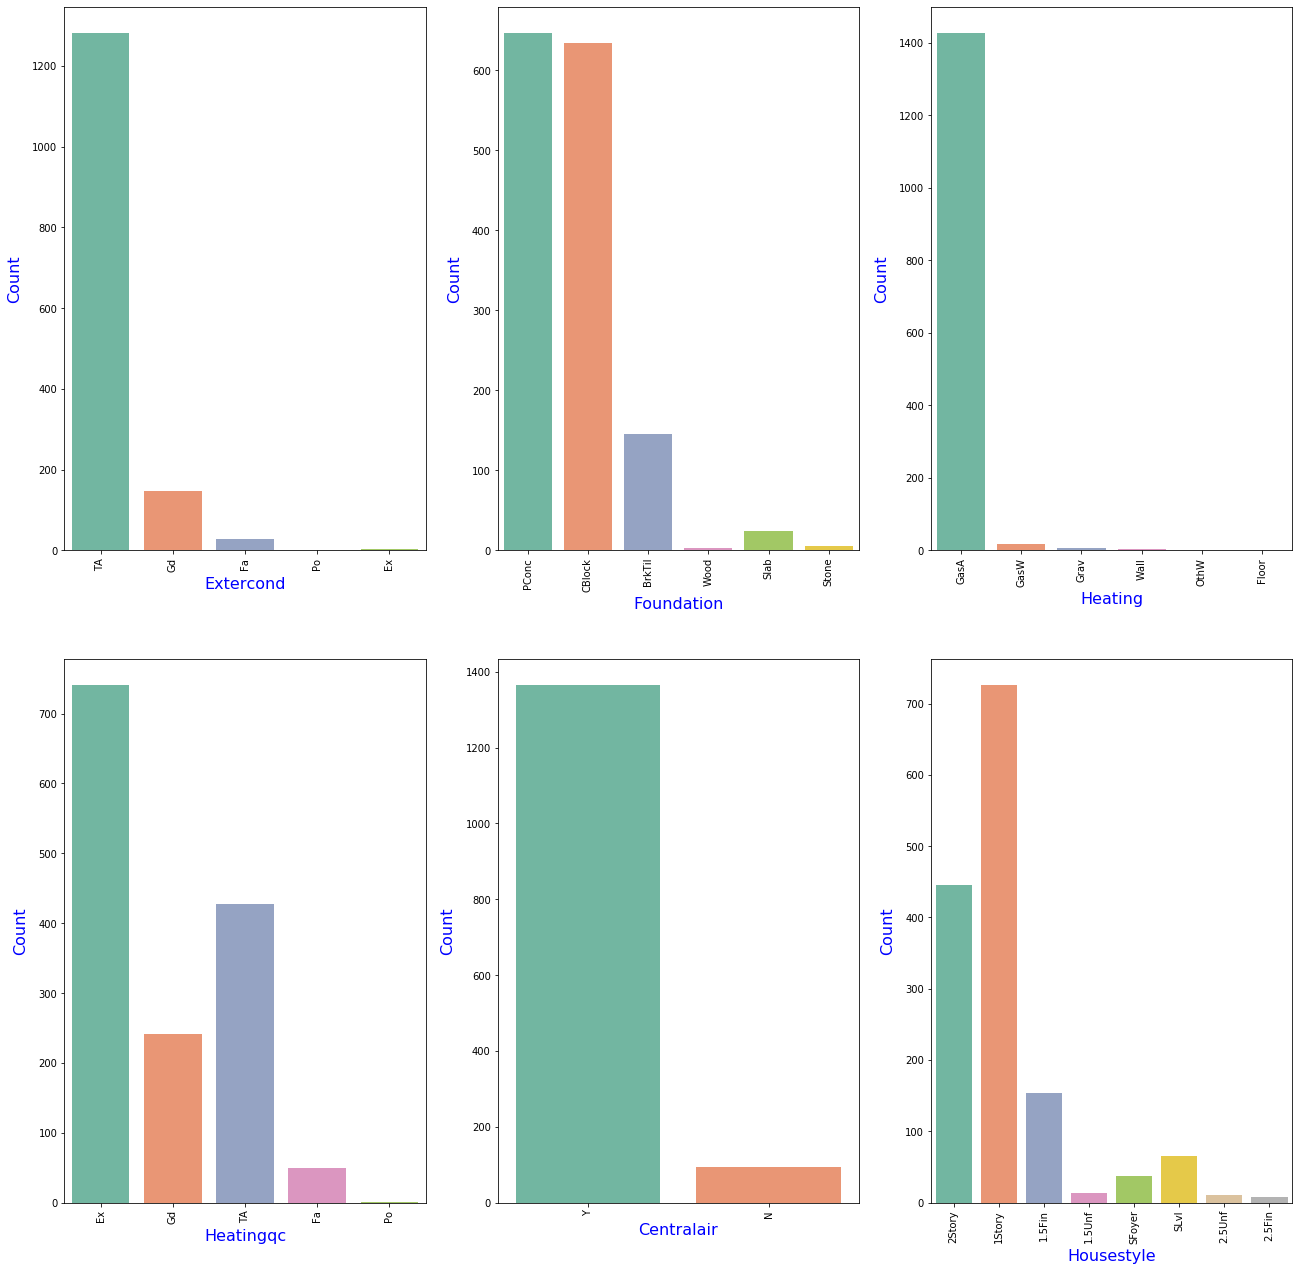

In [42]:
# Performing Univariate analysis

# Randomly making groups of another six colums
col_names = ['ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'HouseStyle']


# Calling custom function for univariate analysis
univariate_cate_func(surp_housing_df ,col_names)

#### Inference:


- From the above count plot, we can see columns `CentralAir`,`Heating` and `ExterCond` are highly skewed. That means most of the information is stored in one category and hence, this column will not help us for prediction of SalesPrice. Therefore, we are dropping these columns
- We can also see that `Foundation` column is having very low count for `Slab`,`Stone`,`Wood` categories. Hence, grouping them into a new category `Others`

In [43]:
# Dropping highly skewed columns 'CentralAir','Heating' and 'ExterCond' 

surp_housing_df.drop(['CentralAir','Heating','ExterCond'], axis=1, inplace=True)

In [44]:
# Grouping 'Slab','Stone','Wood' values to a new category 'Others'

surp_housing_df['Foundation'] = surp_housing_df['Foundation'].replace(['Slab','Stone','Wood'],'Others')

In [45]:
# Checking entries in SaleCondition column after grouping few values

surp_housing_df['Foundation'].value_counts(normalize = True)*100

PConc     44.315068
CBlock    43.424658
BrkTil    10.000000
Others     2.260274
Name: Foundation, dtype: float64

#### Inference:


- Above value count shows new category `Others` has been addedd in column `Foundation` and `Slab`,`Stone`,`Wood` etc. categories are no more exist

In [46]:
# Grouping 'SFoyer','1.5Unf','2.5Unf','2.5Fin' values to a new category 'Others'

surp_housing_df['HouseStyle'] = surp_housing_df['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')

In [47]:
# Checking entries in HouseStyle column after grouping few values

surp_housing_df['HouseStyle'].value_counts(normalize = True)*100

1Story    49.726027
2Story    30.479452
1.5Fin    10.547945
Others     4.794521
SLvl       4.452055
Name: HouseStyle, dtype: float64

#### Inference:


- Above value count shows new category `Others` has been addedd in column `HouseStyle` and `SFoyer`,`1.5Unf`,`2.5Unf`,`2.5Fin` etc. categories are no more exist

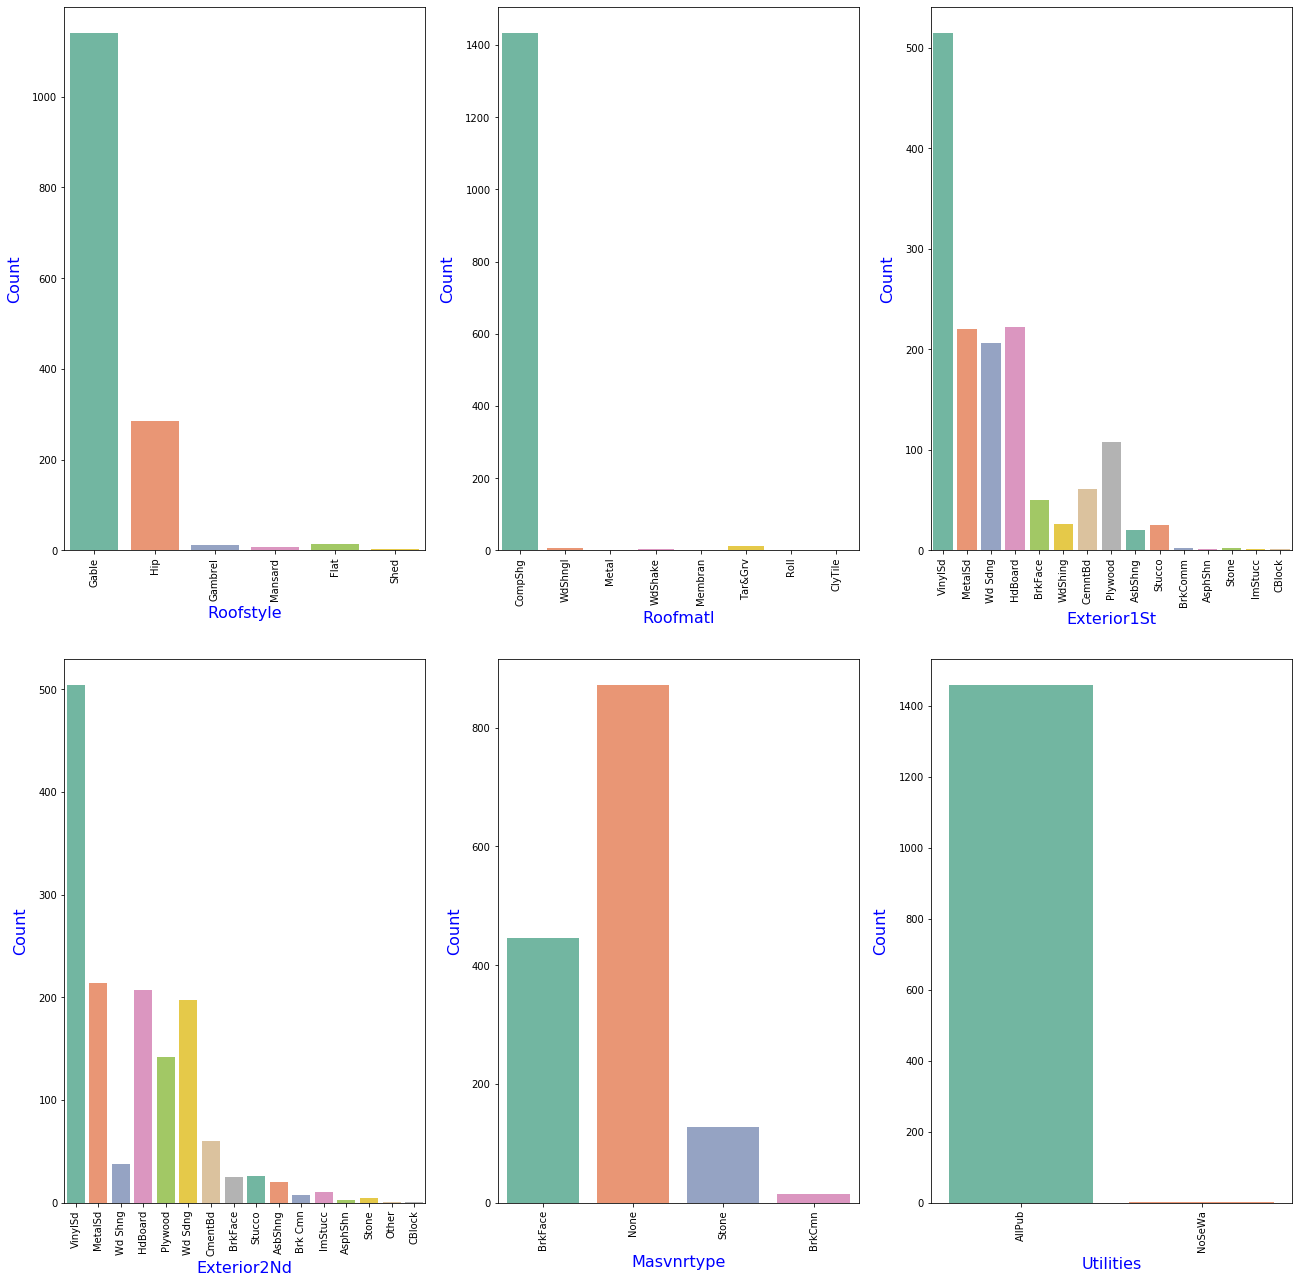

In [48]:
# Performing Univariate analysis

# Randomly making groups of another six colums
col_names = ['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Utilities']


# Calling custom function for univariate analysis
univariate_cate_func(surp_housing_df ,col_names)

#### Inference:


- From the above count plot, we can see columns `RoofMatl` and `Utilities` are highly skewed. That means most of the information is stored in one category and hence, this column will not help us for prediction of SalesPrice. Therefore, we are dropping these columns
- We can also see that `RoofStyle` column is having very low count for `Shed`,`Mansard`,`Gambrel`,`Flat` categories. Hence, grouping them into a new category `Others`
- We can also see that `Exterior1st` column is having very low count for `AsphShn`, `ImStucc`, `CBlock`, `Stone`, `BrkComm`, `AsbShng`,`Stucco`,`WdShing` categories. Hence, grouping them into a new category `Others`
- We can also see that `Exterior2nd` column is having very low count for `Other`,`AsphShn`,`ImStucc`,`CBlock`,`Stone`,`Brk Cmn`,`AsbShng`,`Stucco`,`BrkFace` categories. Hence, grouping them into a new category `Others`

In [49]:
# Dropping highly skewed columns 'RoofMatl','Utilities' 

surp_housing_df.drop(['RoofMatl','Utilities'], axis=1, inplace=True)

In [50]:
# Grouping values with very low count into a new category 'Others' for following columns
# RoofStyle, Exterior1st and Exterior2nd

surp_housing_df['RoofStyle'] = surp_housing_df['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
surp_housing_df['Exterior1st'] = surp_housing_df['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
surp_housing_df['Exterior2nd'] = surp_housing_df['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','Brk Cmn','AsbShng','Stucco','BrkFace'],'Others')

In [51]:
# Checking entries in RoofStyle column after grouping few values

surp_housing_df['RoofStyle'].value_counts(normalize = True)*100

Gable     78.150685
Hip       19.589041
Others     2.260274
Name: RoofStyle, dtype: float64

#### Inference:


- Above value count shows new category `Others` has been addedd in column `RoofStyle` and `Shed`,`Mansard`,`Gambrel`,`Flat` etc. categories are no more exist

In [52]:
# Checking entries in Exterior1st column after grouping few values

surp_housing_df['Exterior1st'].value_counts(normalize = True)*100

VinylSd    35.273973
HdBoard    15.205479
MetalSd    15.068493
Wd Sdng    14.109589
Plywood     7.397260
Others      5.342466
CemntBd     4.178082
BrkFace     3.424658
Name: Exterior1st, dtype: float64

#### Inference:


- Above value count shows new category `Others` has been addedd in column `Exterior1st` and `AsphShn`,`ImStucc`,`CBlock`,`Stone`,`BrkComm`,`AsbShng`,`Stucco`,`WdShing` etc. categories are no more exist

In [53]:
# Checking entries in Exterior2nd column after grouping few values

surp_housing_df['Exterior2nd'].value_counts(normalize = True)*100

VinylSd    34.520548
MetalSd    14.657534
HdBoard    14.178082
Wd Sdng    13.493151
Plywood     9.726027
Others      6.712329
CmentBd     4.109589
Wd Shng     2.602740
Name: Exterior2nd, dtype: float64

#### Inference:


- Above value count shows new category `Others` has been addedd in column `Exterior2nd` and `Other`,`AsphShn`,`ImStucc`,`CBlock`,`Stone`,`Brk Cmn`,`AsbShng`,`Stucco`,`BrkFace` etc. categories are no more exist

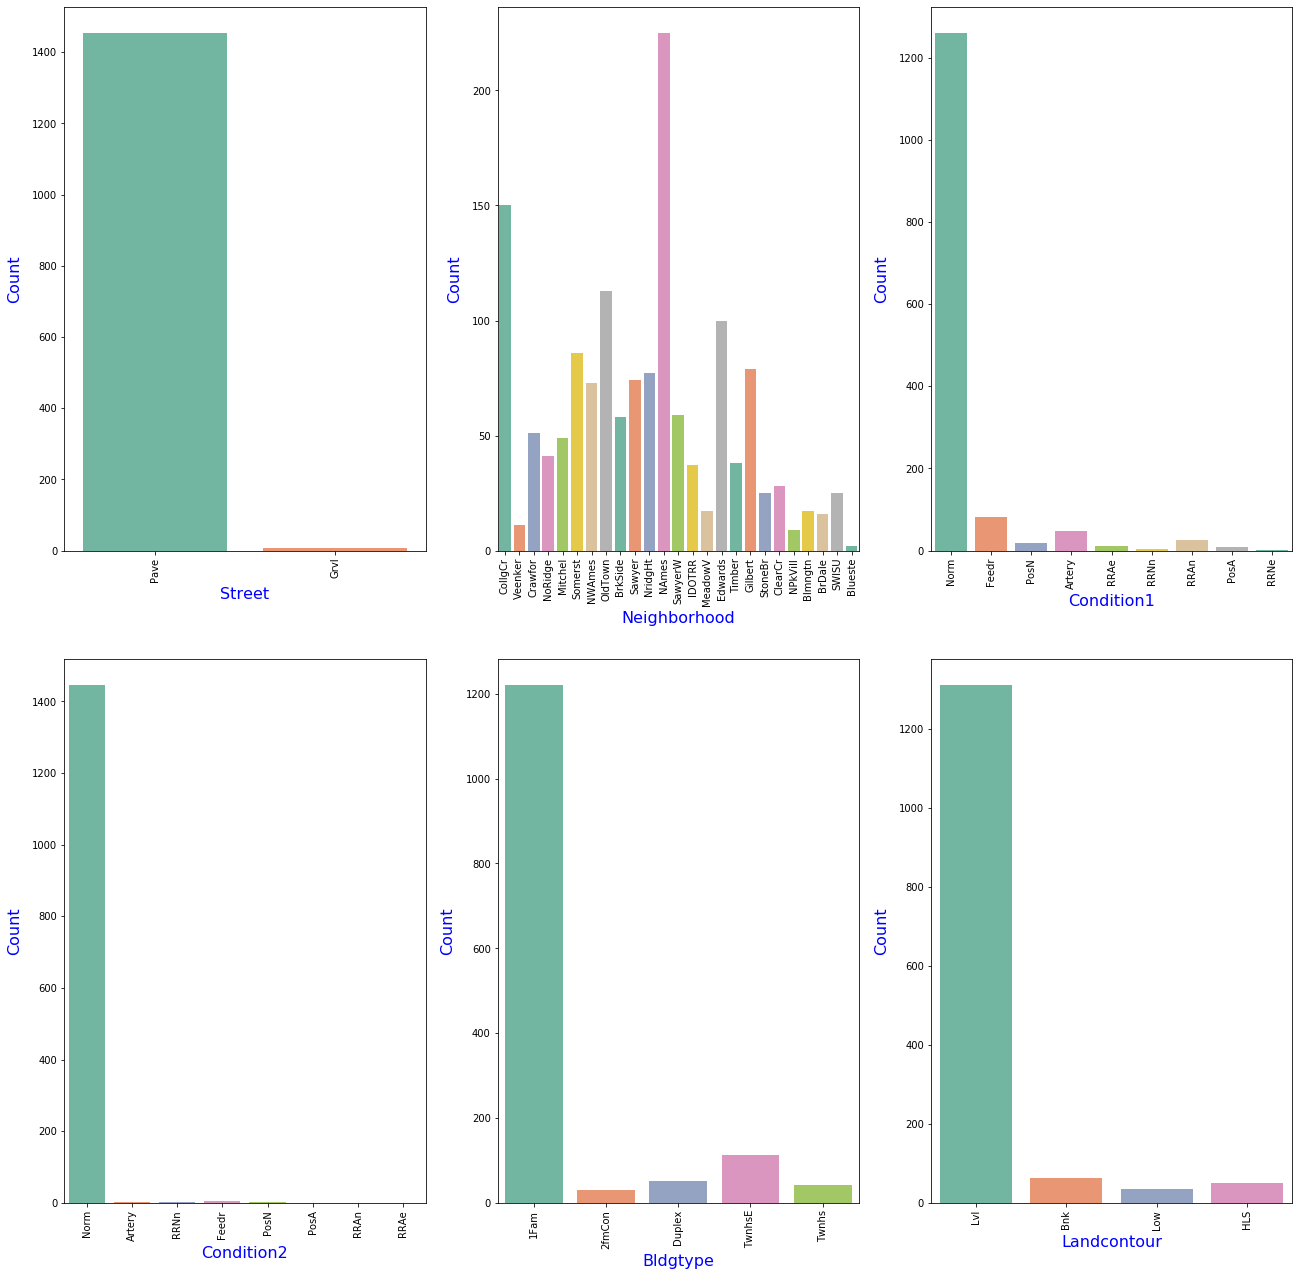

In [54]:
# Performing Univariate analysis

# Randomly making groups of another six colums
col_names = ['Street', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'LandContour']


# Calling custom function for univariate analysis
univariate_cate_func(surp_housing_df ,col_names)

#### Inference:


- From the above count plot, we can see columns `LandContour`,`Street`,`Condition1` & `Condition2` are highly skewed. That means most of the information is stored in one category and hence, this column will not help us for prediction of SalesPrice. Therefore, we are dropping these columns

In [55]:
# Dropping highly skewed columns 'LandContour','Street','Condition1' & 'Condition2'

surp_housing_df.drop(['LandContour','Street','Condition1','Condition2'],axis=1,inplace=True)

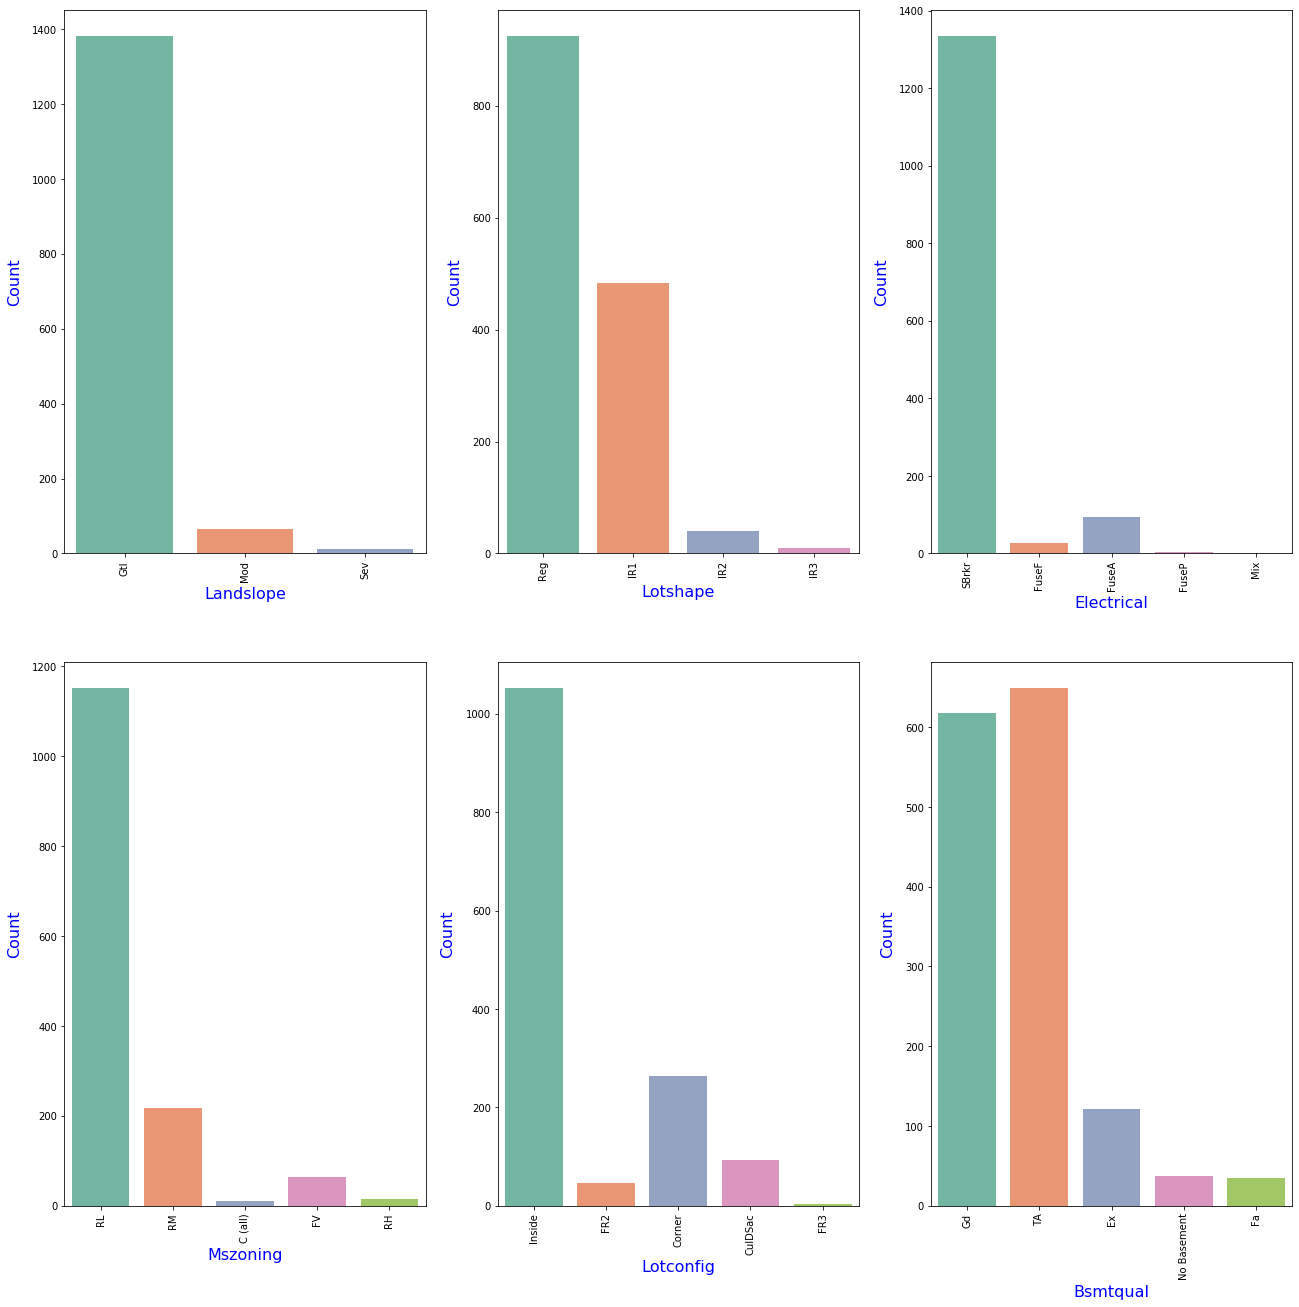

In [56]:
# Performing Univariate analysis

# Randomly making groups of another six colums
col_names = ['LandSlope', 'LotShape', 'Electrical', 'MSZoning', 'LotConfig', 'BsmtQual']


# Calling custom function for univariate analysis
univariate_cate_func(surp_housing_df ,col_names)

#### Inference:


- From the above count plot, we can see columns `LandSlope` and `Electrical` are highly skewed. That means most of the information is stored in one category and hence, this column will not help us for prediction of SalesPrice. Therefore, we are dropping these columns
- We can also see that `MSZoning` column is having very low count for `RH`,`C (all)` categories. Hence, grouping them into a new category `Others`

In [57]:
# Dropping highly skewed columns 'LandSlope' & 'Electrical'

surp_housing_df.drop(['LandSlope','Electrical'], axis=1, inplace=True)

In [58]:
# Grouping values with very low count into a new category 'Others' 

surp_housing_df['MSZoning'] = surp_housing_df['MSZoning'].replace(['RH','C (all)'],'Others')

In [59]:
# Checking entries in MSZoning column after grouping few values

surp_housing_df['MSZoning'].value_counts(normalize = True)*100

RL        78.835616
RM        14.931507
FV         4.452055
Others     1.780822
Name: MSZoning, dtype: float64

#### Inference:


- Above value count shows new category `Others` has been addedd in column `MSZoning` and `RH`,`C (all)` etc. categories are no more exist

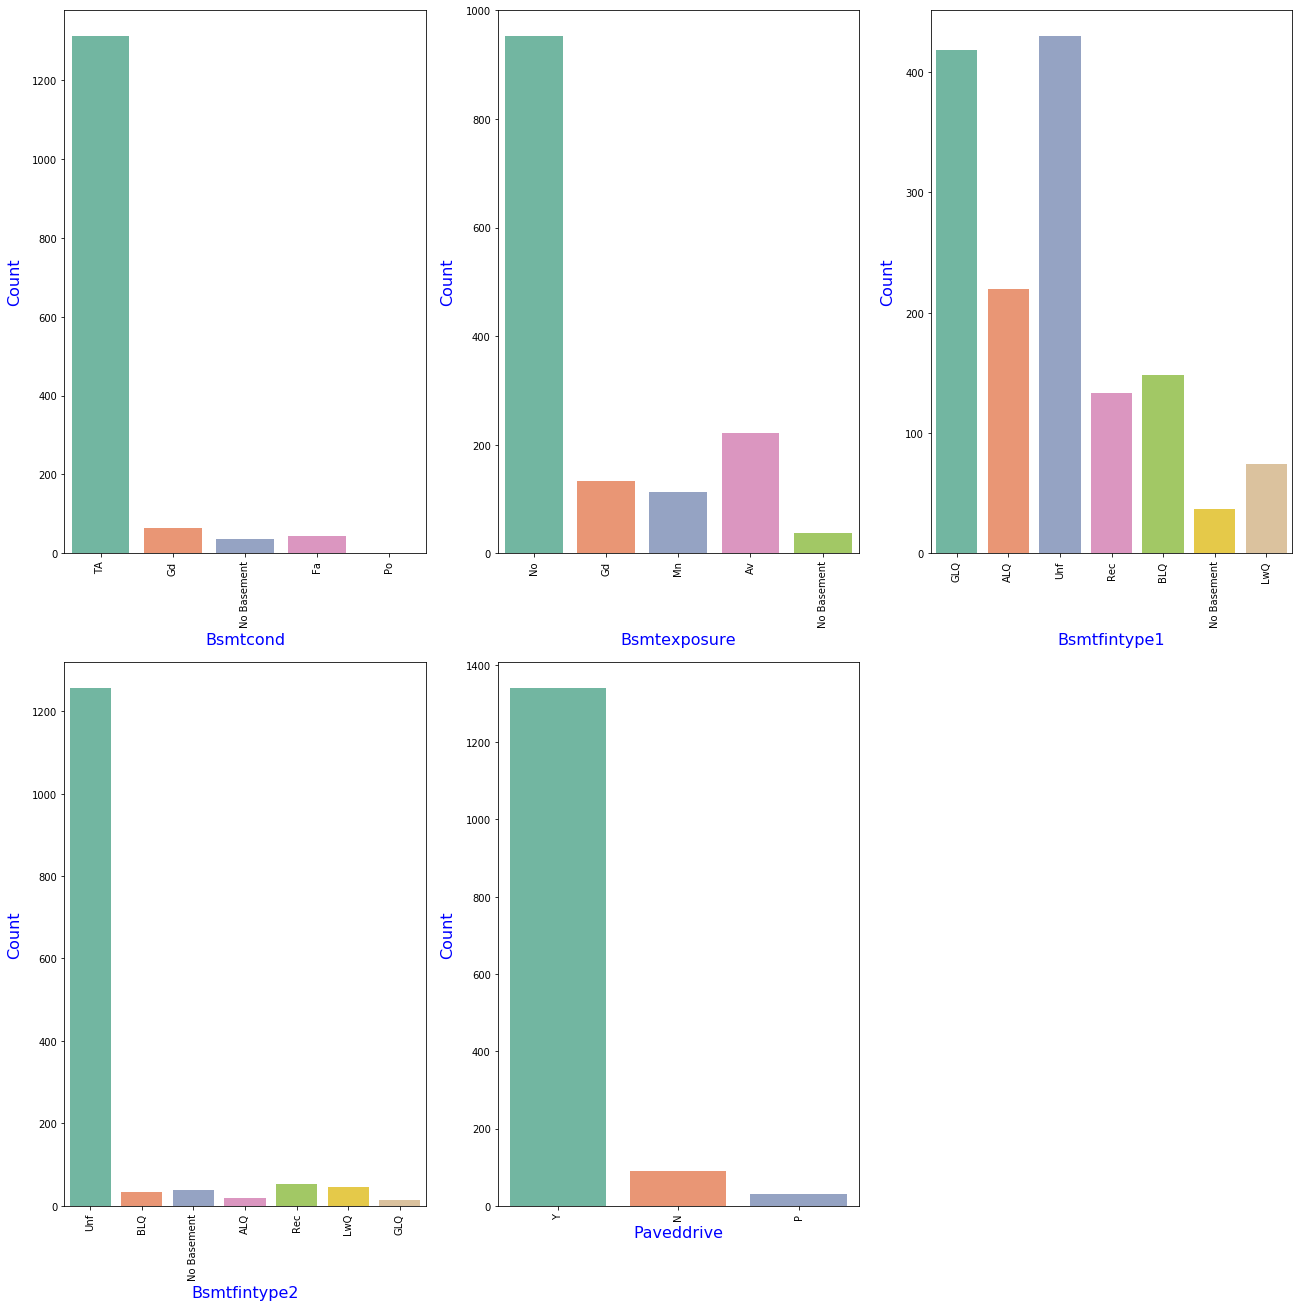

In [60]:
# Performing Univariate analysis

# Randomly making groups of rest all colums
col_names = ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'PavedDrive']


# Calling custom function for univariate analysis
univariate_cate_func(surp_housing_df ,col_names)

#### Inference:


- From the above count plot, we can see columns `BsmtFinType2`,`PavedDrive` & `BsmtCond` are highly skewed. That means most of the information is stored in one category and hence, this column will not help us for prediction of SalesPrice. Therefore, we are dropping these columns

In [61]:
# Dropping highly skewed columns 'BsmtFinType2','PavedDrive' & 'BsmtCond'

surp_housing_df.drop(['BsmtFinType2','PavedDrive','BsmtCond'],axis=1,inplace=True)

In [62]:
# Checking shape (number of rows & columns) of the DataFrame after dropping skwed columns

surp_housing_df.shape

(1460, 58)

#### Inference:

- After dropping all skewed categorical column, we are having 58 columns in our dataset

### Derived Variable creation

- Create new variable to store age of building using `YearBuild` column


- Dropping below year related columns as there is no further use of these column in prediction
    - `YearBuilt`
    - `YearRemodAdd`
    - `GarageYrBlt`
    - `YrSold`
    - `MoSold`
    
    
    
- Also dropping `Id` column as it is not useful for prediction

In [63]:
# Extract age of building using 'YearBuilt' column 

# Extract current year from today's date
curr_year = date.today().year

# Adding Age column in DataFrame to display age of the building
surp_housing_df['AgeOftheHouse'] = curr_year - surp_housing_df['YearBuilt']

In [64]:
# Dropping original 'YearBuilt' column along with the other year & month columns 'YearRemodAdd',
# 'GarageYrBlt','YrSold', 'MoSold' as there is no use of these columns for prediction

surp_housing_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold'], axis=1, inplace=True)

In [65]:
# Dropping 'Id' column as that is not required for prediction

surp_housing_df.drop(['Id'], axis = 1, inplace = True)

In [66]:
# Checking the shape of the DataFrame after dropping four year columns

surp_housing_df.shape

(1460, 53)

In [67]:
# Displaying top 5 rows of the dataFrame 

surp_housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleCondition,SalePrice,AgeOftheHouse
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,RFn,2,548,0,61,0,0,0,0,0,Normal,208500,18
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Above Average,Very Good,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,RFn,2,460,298,0,0,0,0,0,0,Normal,181500,45
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,RFn,2,608,0,42,0,0,0,0,0,Normal,223500,20
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,Good,Average,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,Unf,3,642,0,35,272,0,0,0,0,Abnorml,140000,106
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,Very Good,Average,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,RFn,3,836,192,84,0,0,0,0,0,Normal,250000,21


## Bivariate Analysis

### Categorical vs. Nummerical Variables

In [68]:
# Custom function for Bivariate Analysis on categorical columns and target variable 'SalePrice'

# Function Input: DataFrame , column list
# Function Output: Returns None


def Bivariate_BoxAnalysis_func (df,column):
    
    # Setting the figure size for countplot
    plt.figure(figsize = (15,15))
    
    # Loop through each categorical columns having null values
    for col in enumerate(list(column)):
        
        # Setting subplot co-ordinates
        plt.subplot(2,2,col[0]+1)
        
        # Plotting box plot using seaborn
        sns.boxplot(df[col[1]], df['SalePrice'], palette = 'Set2')

        # Setting X- axis and Y- axix display size
        plt.xticks(fontsize = 10, rotation = 90)
        
        # Setting axis labels
        plt.ylabel("SalePrice",fontsize = 16, color = 'blue', labelpad = 10)
        plt.xlabel(col[1],fontsize = 16, color = 'blue', labelpad = 5)
    
# Displaying the plot using matplotlib.pyplot show() function
plt.show()

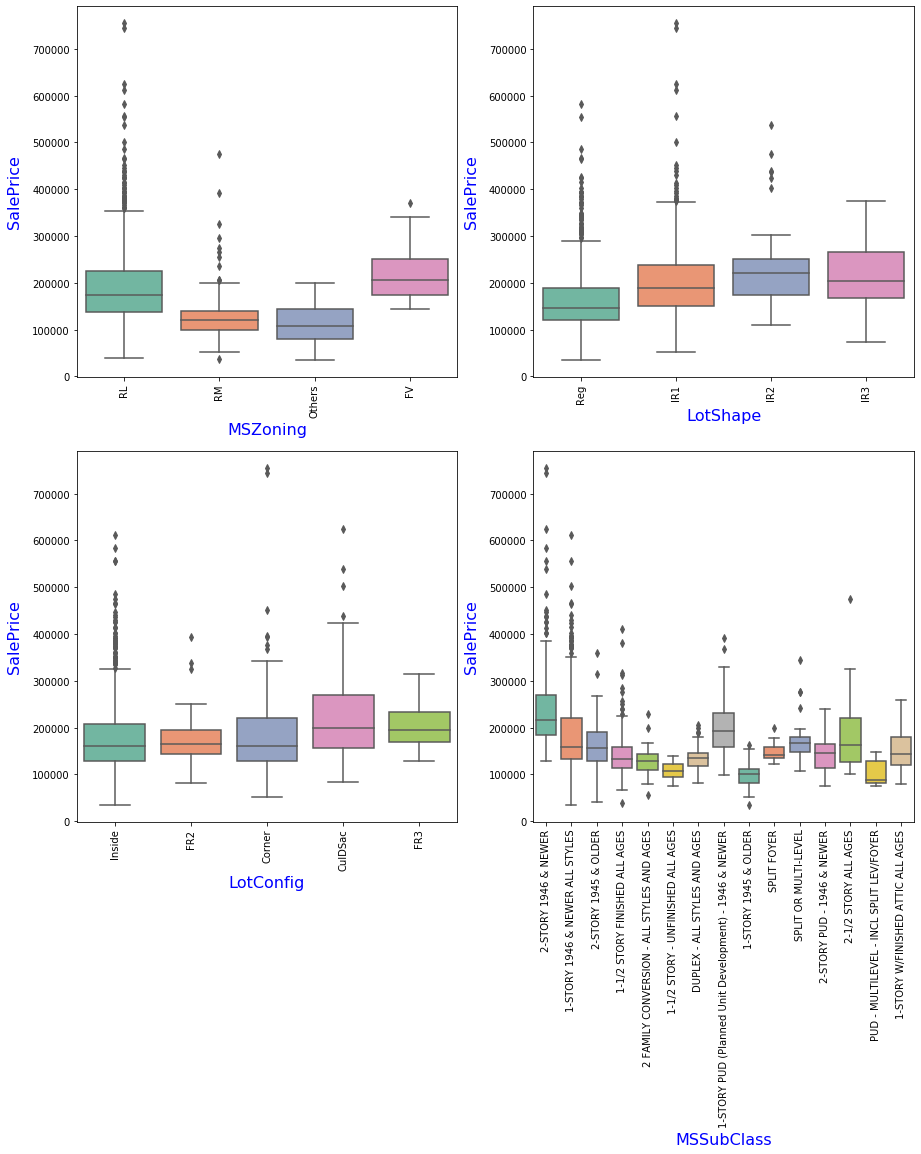

In [69]:
# Performing Bivariate analysis

# Randomly making groups of four colums
col_names = ['MSZoning', 'LotShape', 'LotConfig', 'MSSubClass']


# Calling custom function for Bivariate analysis
Bivariate_BoxAnalysis_func(surp_housing_df ,col_names)

#### Inference:

- From the above plot of MSZoning, we can see that the housing sales price is `high` at `Residential Low Density and Floating Village Residential zones`

- From the above plot of Lot Shape, we can see that the housing sales price is `high` for `Slightly irregular shapped properties`

- From the above plot of Lot configuration, we can see that the housing sales price is `high` for `Cul-de-sac configuration`

- From the above plot of MSSubClass, we can see that the housing sales price is `high` for `2-STORY PUD - 1946 & NEWER` type of dwelling

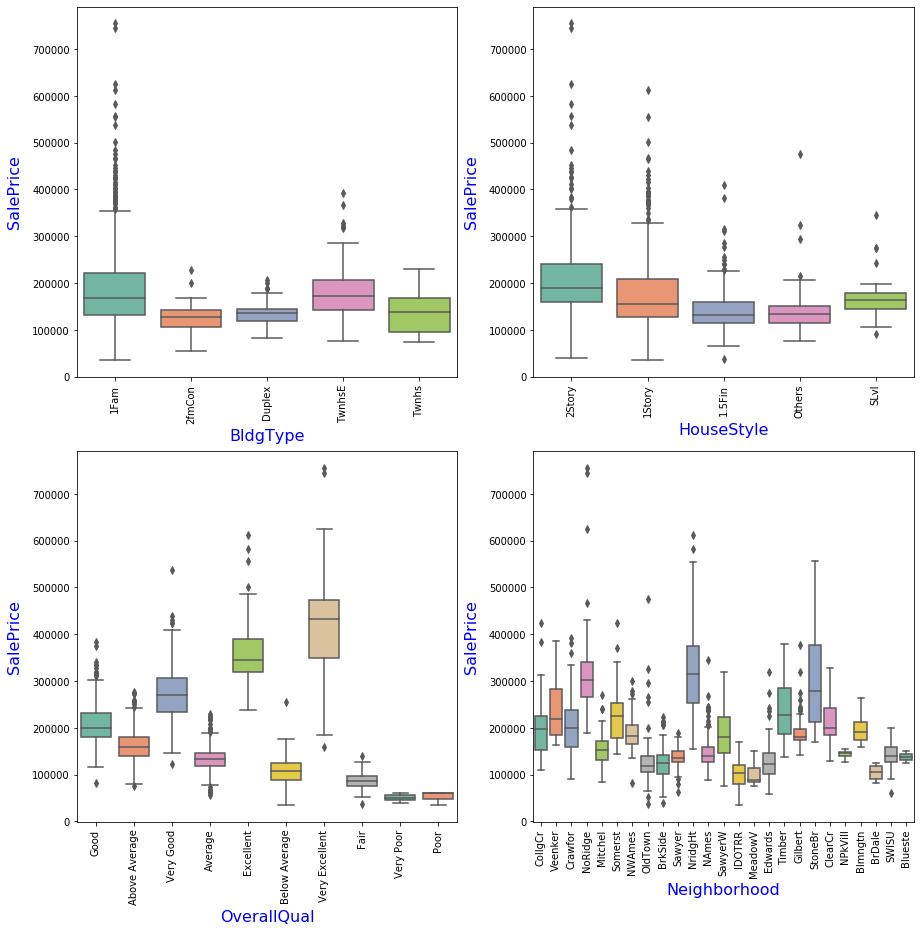

In [70]:
# Performing Bivariate analysis

# Randomly making groups of another four colums
col_names = ['BldgType', 'HouseStyle', 'OverallQual', 'Neighborhood']


# Calling custom function for Bivariate analysis
Bivariate_BoxAnalysis_func(surp_housing_df ,col_names)

#### Inference:

- From the above plot of `BldgType`, we can see that the housing sales price is high around `Single-family Detached` dwelling

- From the above plot of `HouseStyle`, we can see that the housing sales price is high for `Two story residents`

- From the above plot of `OverallQual`, we can see that the housing sales price is high for `Very Excellent and Excellent` quality houses, where as sales price is very low for `Poor and Very Poor` quality houses

- From the above plot of Neighborhood, we can see that the housing sales price is high for `Stone Brook` & `Northridge Heights` locations within Ames city limits

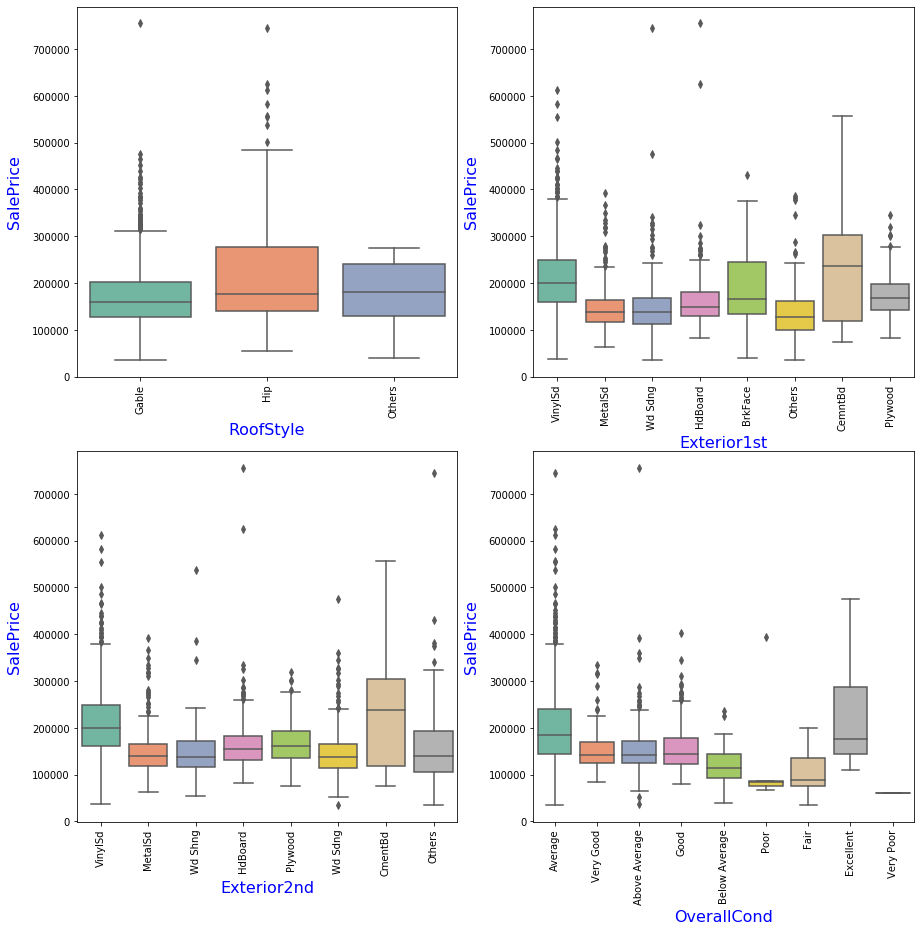

In [71]:
# Performing Bivariate analysis

# Randomly making groups of another four colums
col_names = ['RoofStyle', 'Exterior1st', 'Exterior2nd', 'OverallCond']


# Calling custom function for Bivariate analysis
Bivariate_BoxAnalysis_func(surp_housing_df ,col_names)

#### Inference:

- From the above plot of `RoofStyle`, we can see that the housing sales price is high for `Hip` type of roof and low for `Gable` type of roof

- From the above plot of `Exterior1st` and `Exterior2nd`, we can see that the housing sales price is high for `Cement Board` type of exterior covering on house

- From the above plot of `OverallCond`, we can see that the housing sales price is high where the overall condition of the house is `Excellent`

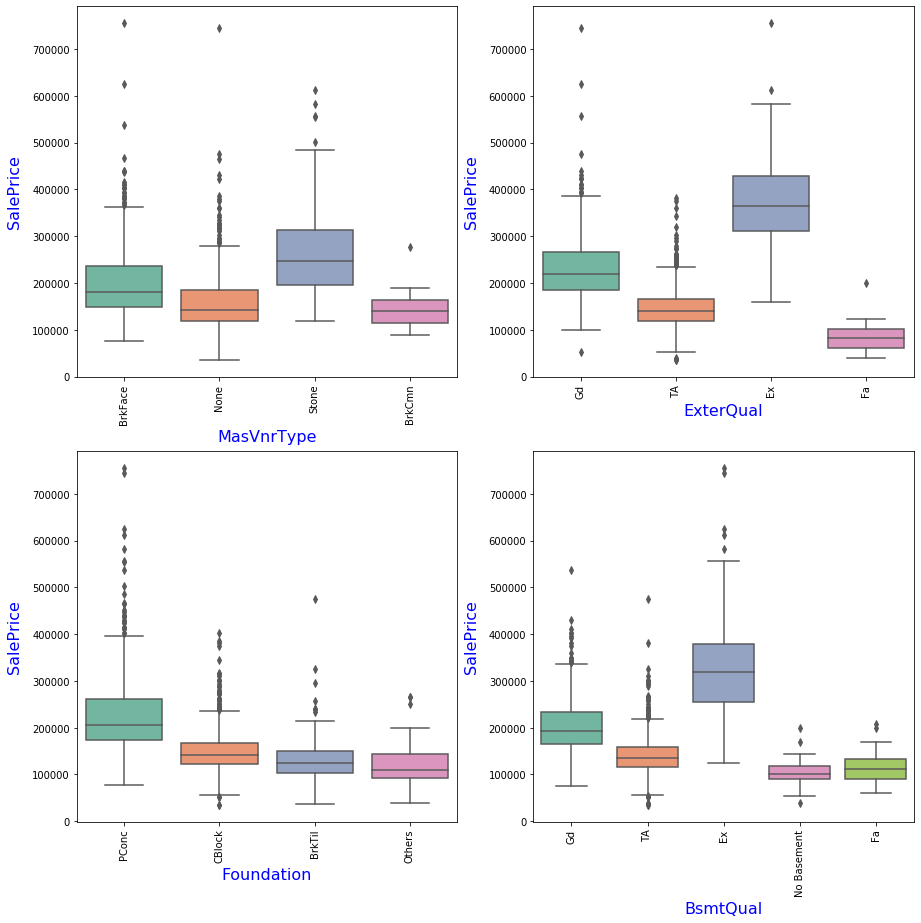

In [72]:
# Performing Bivariate analysis

# Randomly making groups of another four colums
col_names = ['MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual']


# Calling custom function for Bivariate analysis
Bivariate_BoxAnalysis_func(surp_housing_df ,col_names)

#### Inference:

- From the above plot of `MasVnrType`, we can see that the housing sales price is high where Masonry veneer type is `Stone`

- From the above plot of `ExterQual`, we can see that the housing sales price is high where the the quality of the material on the exterior is `Excellent`

- From the above plot of `Foundation`, we can see that the housing sales price is high where Type of foundation is `Poured Contrete`

- From the above plot of `BsmtQual`, we can see that the housing sales price is high where the height of the basement is `Excellent (100+ inches)`

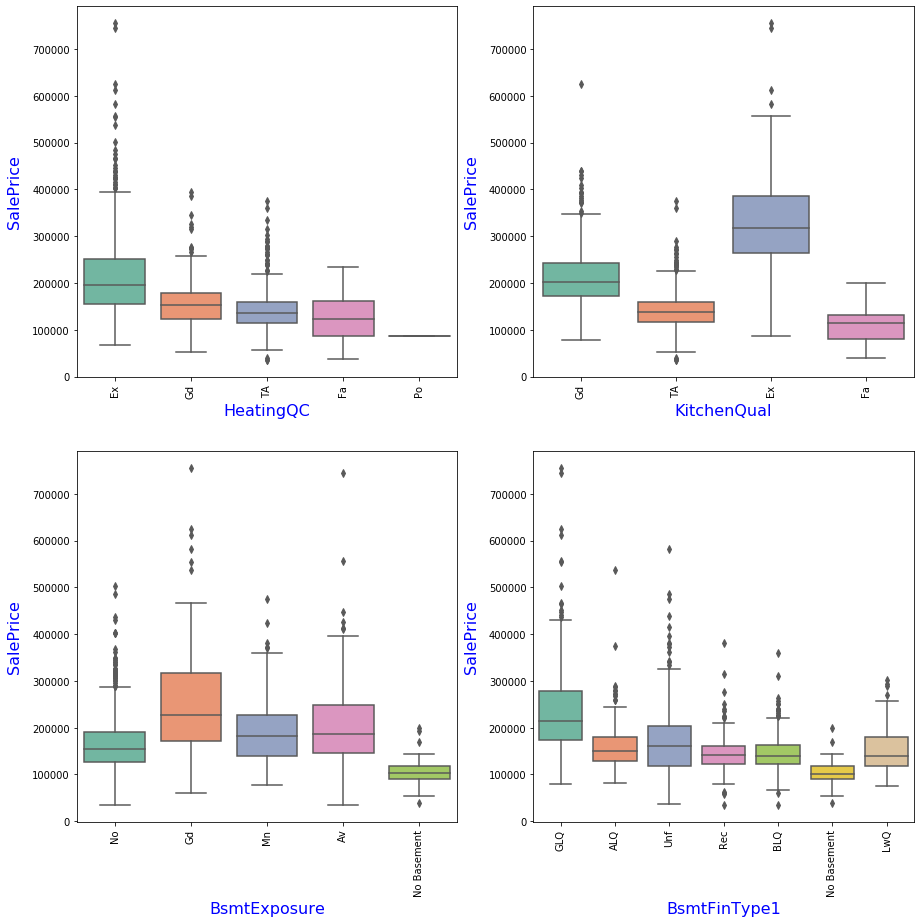

In [73]:
# Performing Bivariate analysis

# Randomly making groups of another four colums
col_names = ['HeatingQC', 'KitchenQual', 'BsmtExposure', 'BsmtFinType1']


# Calling custom function for Bivariate analysis
Bivariate_BoxAnalysis_func(surp_housing_df ,col_names)

#### Inference:

- From the above plot of `HeatingQC`, we can see that the housing sales price is high where the heating quality and condition is `Excellent`

- From the above plot of `KitchenQual`, we can see that the housing sales price is high where Kitchen quality is `Excellent`

- From the above plot of `BsmtExposure`, we can see that the housing sales price is high where garden level walls are having `Good Exposure` , where as sales price is very low for `No Basement` exposure

- From the above plot of `BsmtFinType1`, we can see that the housing sales price is high where rating of basement finished area is falls at `Good Living Quarters` 

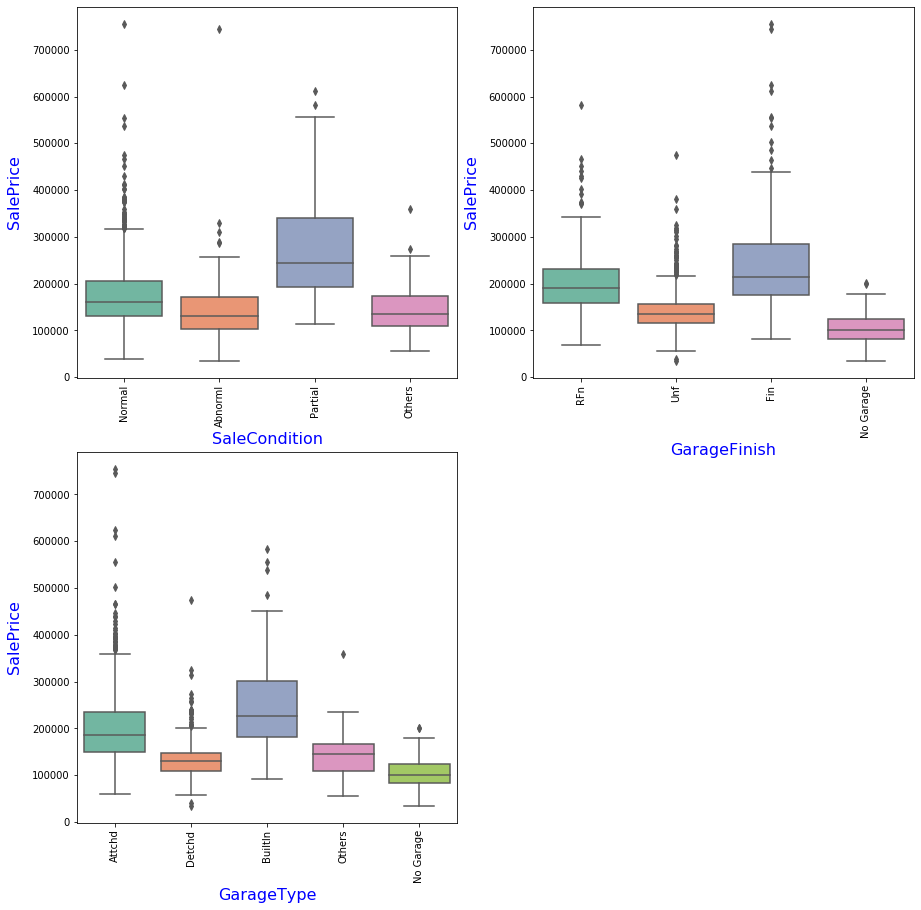

In [74]:
# Performing Bivariate analysis

# Randomly making groups of rest all colums
col_names = ['SaleCondition', 'GarageFinish', 'GarageType']


# Calling custom function for Bivariate analysis
Bivariate_BoxAnalysis_func(surp_housing_df ,col_names)

#### Inference:

- From the above plot of `SaleCondition`, we can see that the housing sales price is high where the Condition of sale is `Partial` i.e. home was not completed when last assessed (associated with New Homes)

- From the above plot of `GarageFinish`, we can see that the housing sales price is high where interior finish of the garage is `Finished`

- From the above plot of `GarageType`, we can see that the housing sales price is high where garage location is `Built-In (Garage part of house - typically has room above garage)`

### Numerical vs. Numerical Variables

In [75]:
# Custom function for bivariate analysis for numerical columns and finding pattern of target variable


# Function Input: DataFrame , column list
# Function Output: Returns None

def Bivariate_ScatterAnalysis_func(df, number_cols):
    
  # Setting the figure size for scatterplot
  plt.figure(figsize = (18,16))
    
# ploting the scatter plot using subplot
  for col_num in enumerate(number_cols):
        
    plt.subplot(2,2,col_num[0]+1)
    
    sns.scatterplot(df[col_num[1]],df['SalePrice'])
    
  # Setting axis display zize
    plt.xticks(fontsize=10)
    plt.yticks(fontsize='10')
    
  # Setting axis labels
    plt.ylabel("SalePrice",fontsize = 15, color = 'blue', labelpad = 12)
    plt.xlabel(col_num[1].title(),fontsize = 15, color = 'blue', labelpad = 12)
    
# Displaying the plot using matplotlib.pyplot show() function
  plt.show()

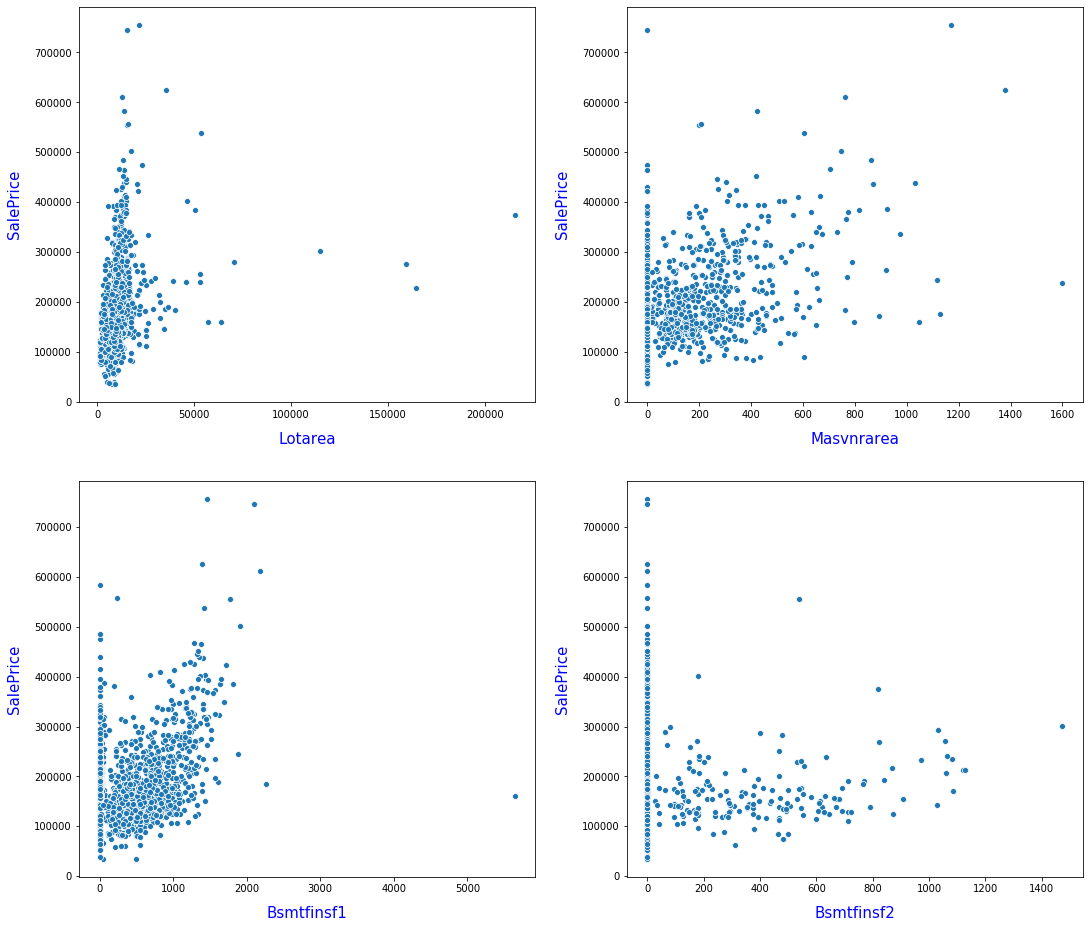

In [76]:
# Performing Bivariate analysis - Numerical vs. Numerical columns

# Randomly making groups of four colums
col_names = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2']


# Calling custom function for Bivariate analysis
Bivariate_ScatterAnalysis_func(surp_housing_df ,col_names)

#### Inference:

- From the above scatter plot we can see that `housing sales price` is having `good linear relation` with `Masonry veneer area (in square feet)` and  `Type 2 finished (in square feet)`, where as the relation is `not so linear` with `Type 1 finished (in square feet)` and `Lot size (in square feet)`

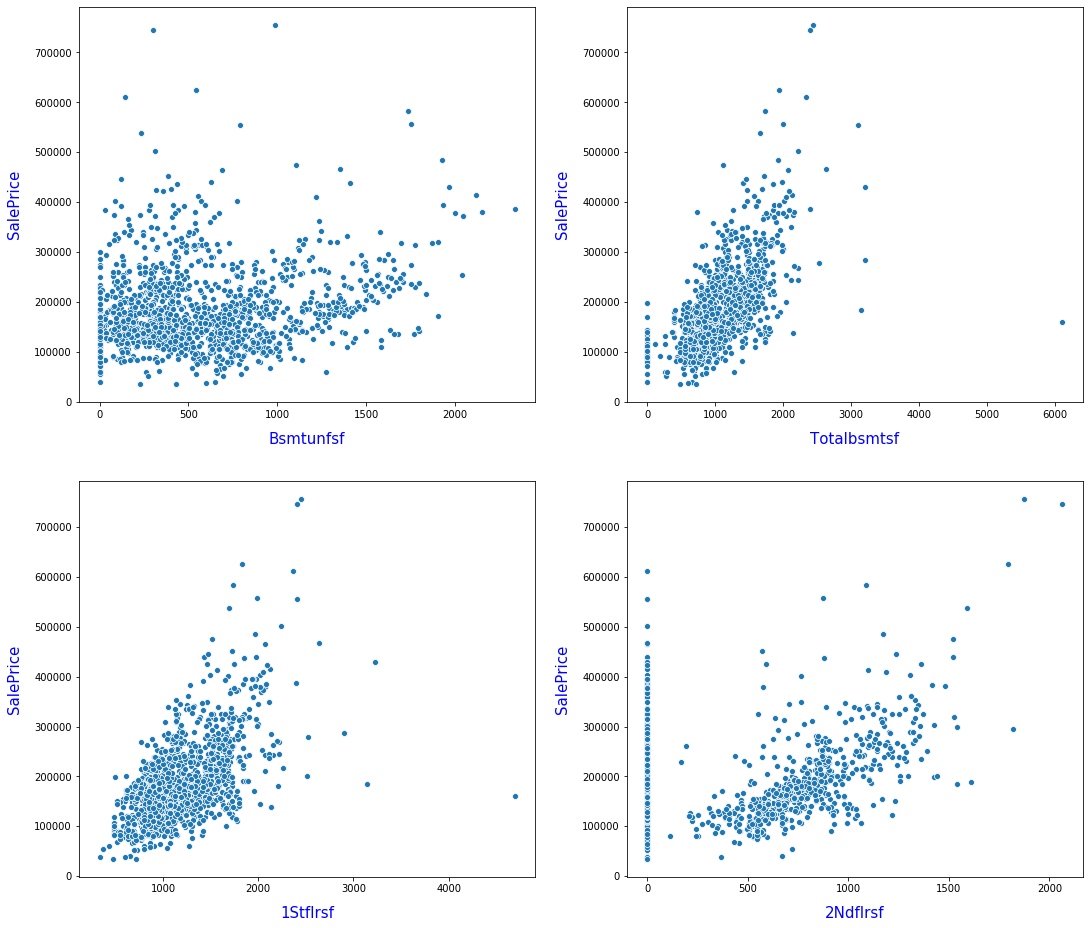

In [77]:
# Performing Bivariate analysis - Numerical vs. Numerical columns

# Randomly making groups of four colums
col_names = ['BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']


# Calling custom function for Bivariate analysis
Bivariate_ScatterAnalysis_func(surp_housing_df ,col_names)

#### Inference:

- From the above scatter plot we can see that `housing sales price` is having `good linear relation` with `Unfinished square feet of basement area` ,`Total square feet of basement area`, `First Floor square feet` and `Second floor square feet`

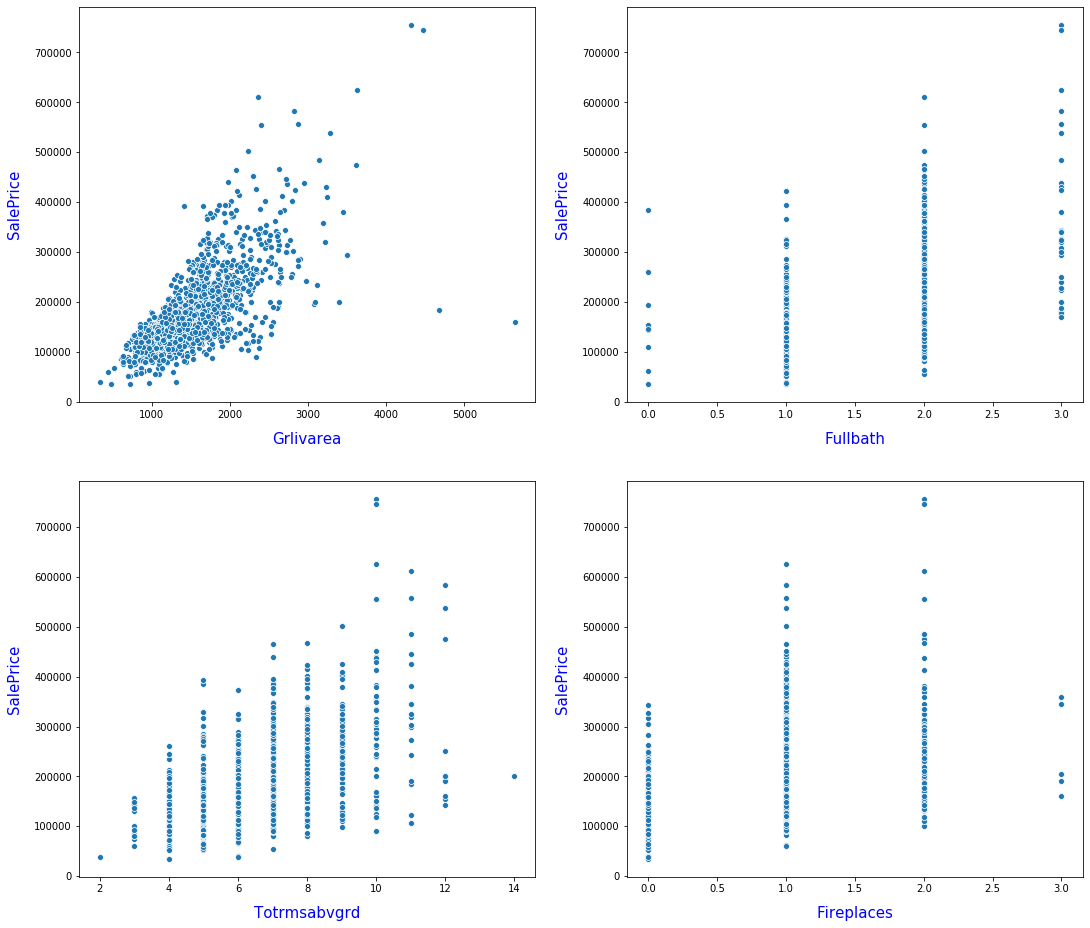

In [78]:
# Performing Bivariate analysis - Numerical vs. Numerical columns

# Randomly making groups of four colums
col_names = ['GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces']


# Calling custom function for Bivariate analysis
Bivariate_ScatterAnalysis_func(surp_housing_df ,col_names)

#### Inference:

- From the above scatter plot we can see that `housing sales price` is having `good linear relation` with `ground) living area square feet`, where as the relation is `not so linear` with `Full bathrooms above grade`, `Total rooms above grade (does not include bathrooms)` and `Number of fireplaces`

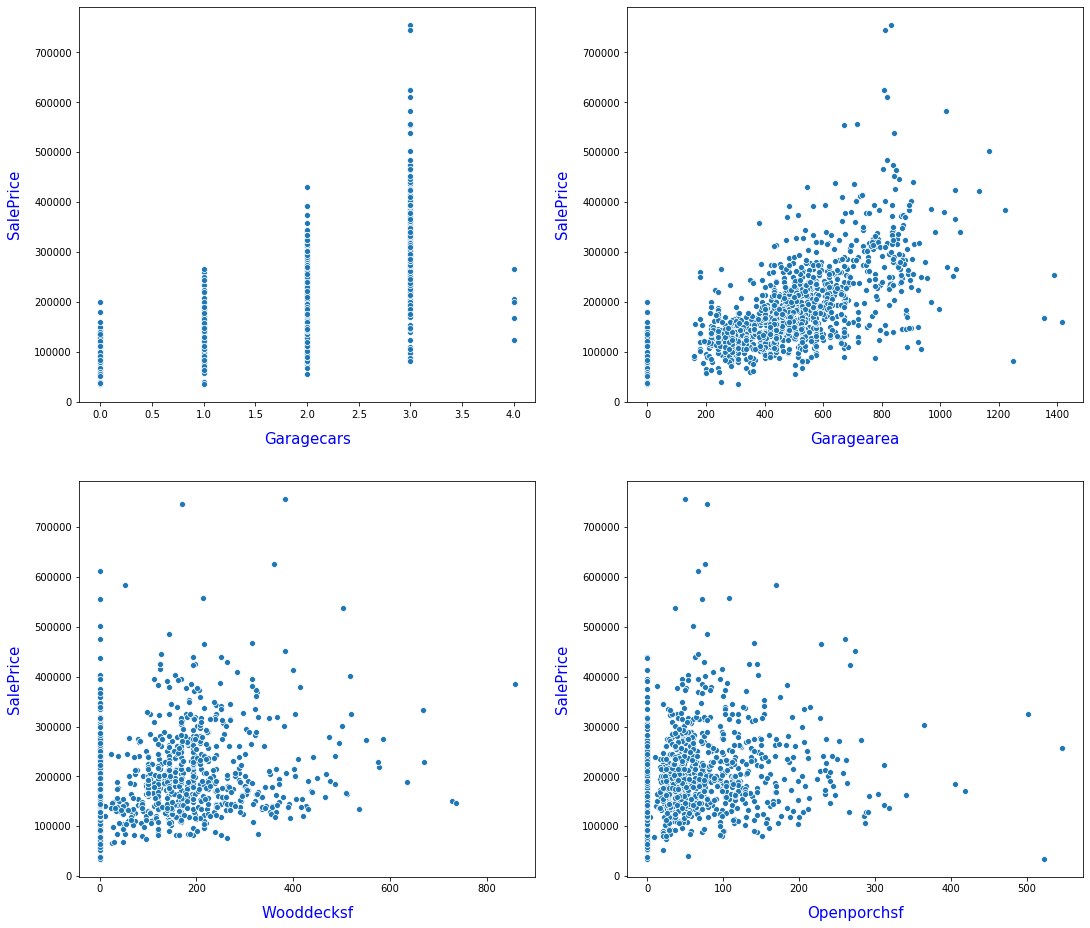

In [79]:
# Performing Bivariate analysis - Numerical vs. Numerical columns

# Randomly making groups of four colums
col_names = ['GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']


# Calling custom function for Bivariate analysis
Bivariate_ScatterAnalysis_func(surp_housing_df ,col_names)

#### Inference:

- From the above scatter plot we can see that `housing sales price` is having `good linear relation` with `Size of garage in square feet`, `Wood deck area in square feet` and  `Open porch area in square feet`, where as the relation is `not so linear` with `Size of garage in car capacity`

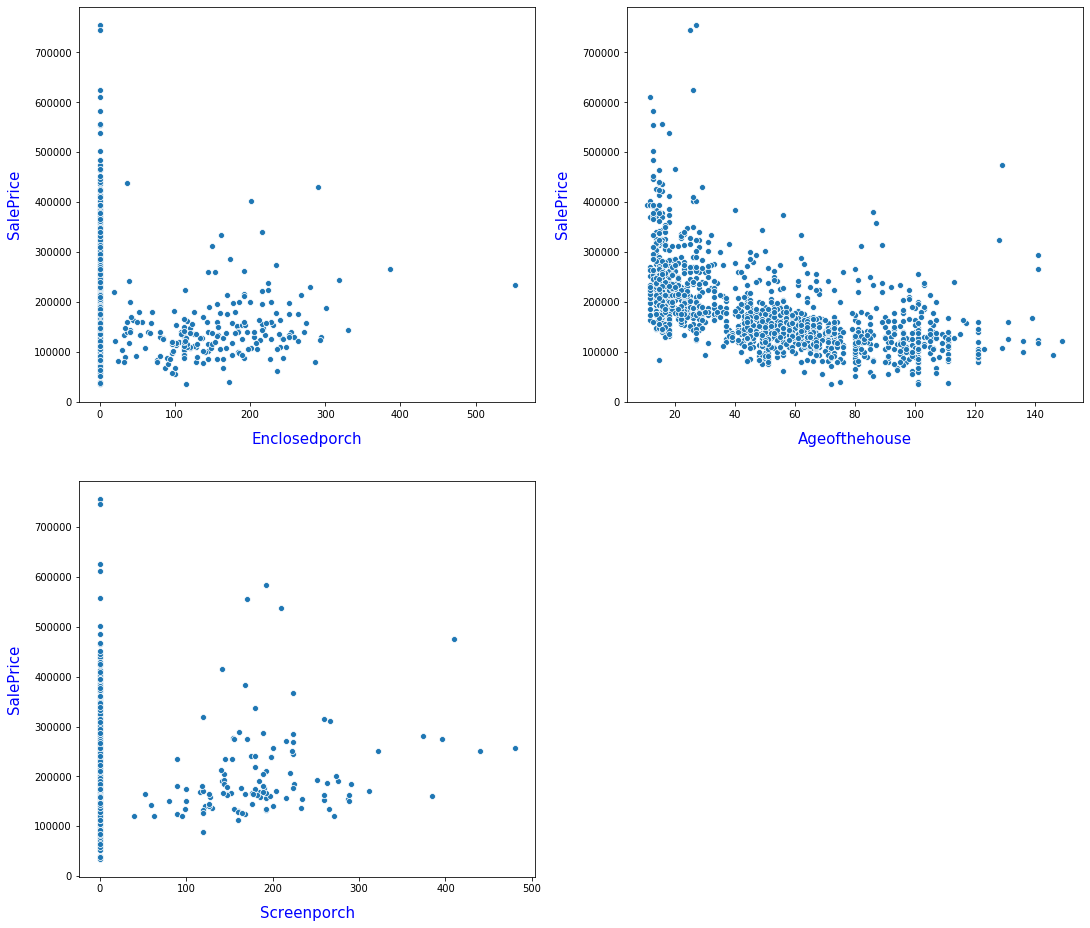

In [80]:
# Performing Bivariate analysis - Numerical vs. Numerical columns

# Randomly making groups of four colums
col_names = ['EnclosedPorch', 'AgeOftheHouse', 'ScreenPorch']


# Calling custom function for Bivariate analysis
Bivariate_ScatterAnalysis_func(surp_housing_df ,col_names)

#### Inference:

- From the above scatter plot we can see that `housing sales price` is having `good linear relation` with `Enclosed porch area in square feet` and  `Age of the house`, where as the relation is `not so linear` with `Screen porch area in square feet`
- We can see the housing `sales price` is showing a `decreasing linear relation` i.e. negative relationship with `age of the house`

### Correlation Analysis among Numerical Features

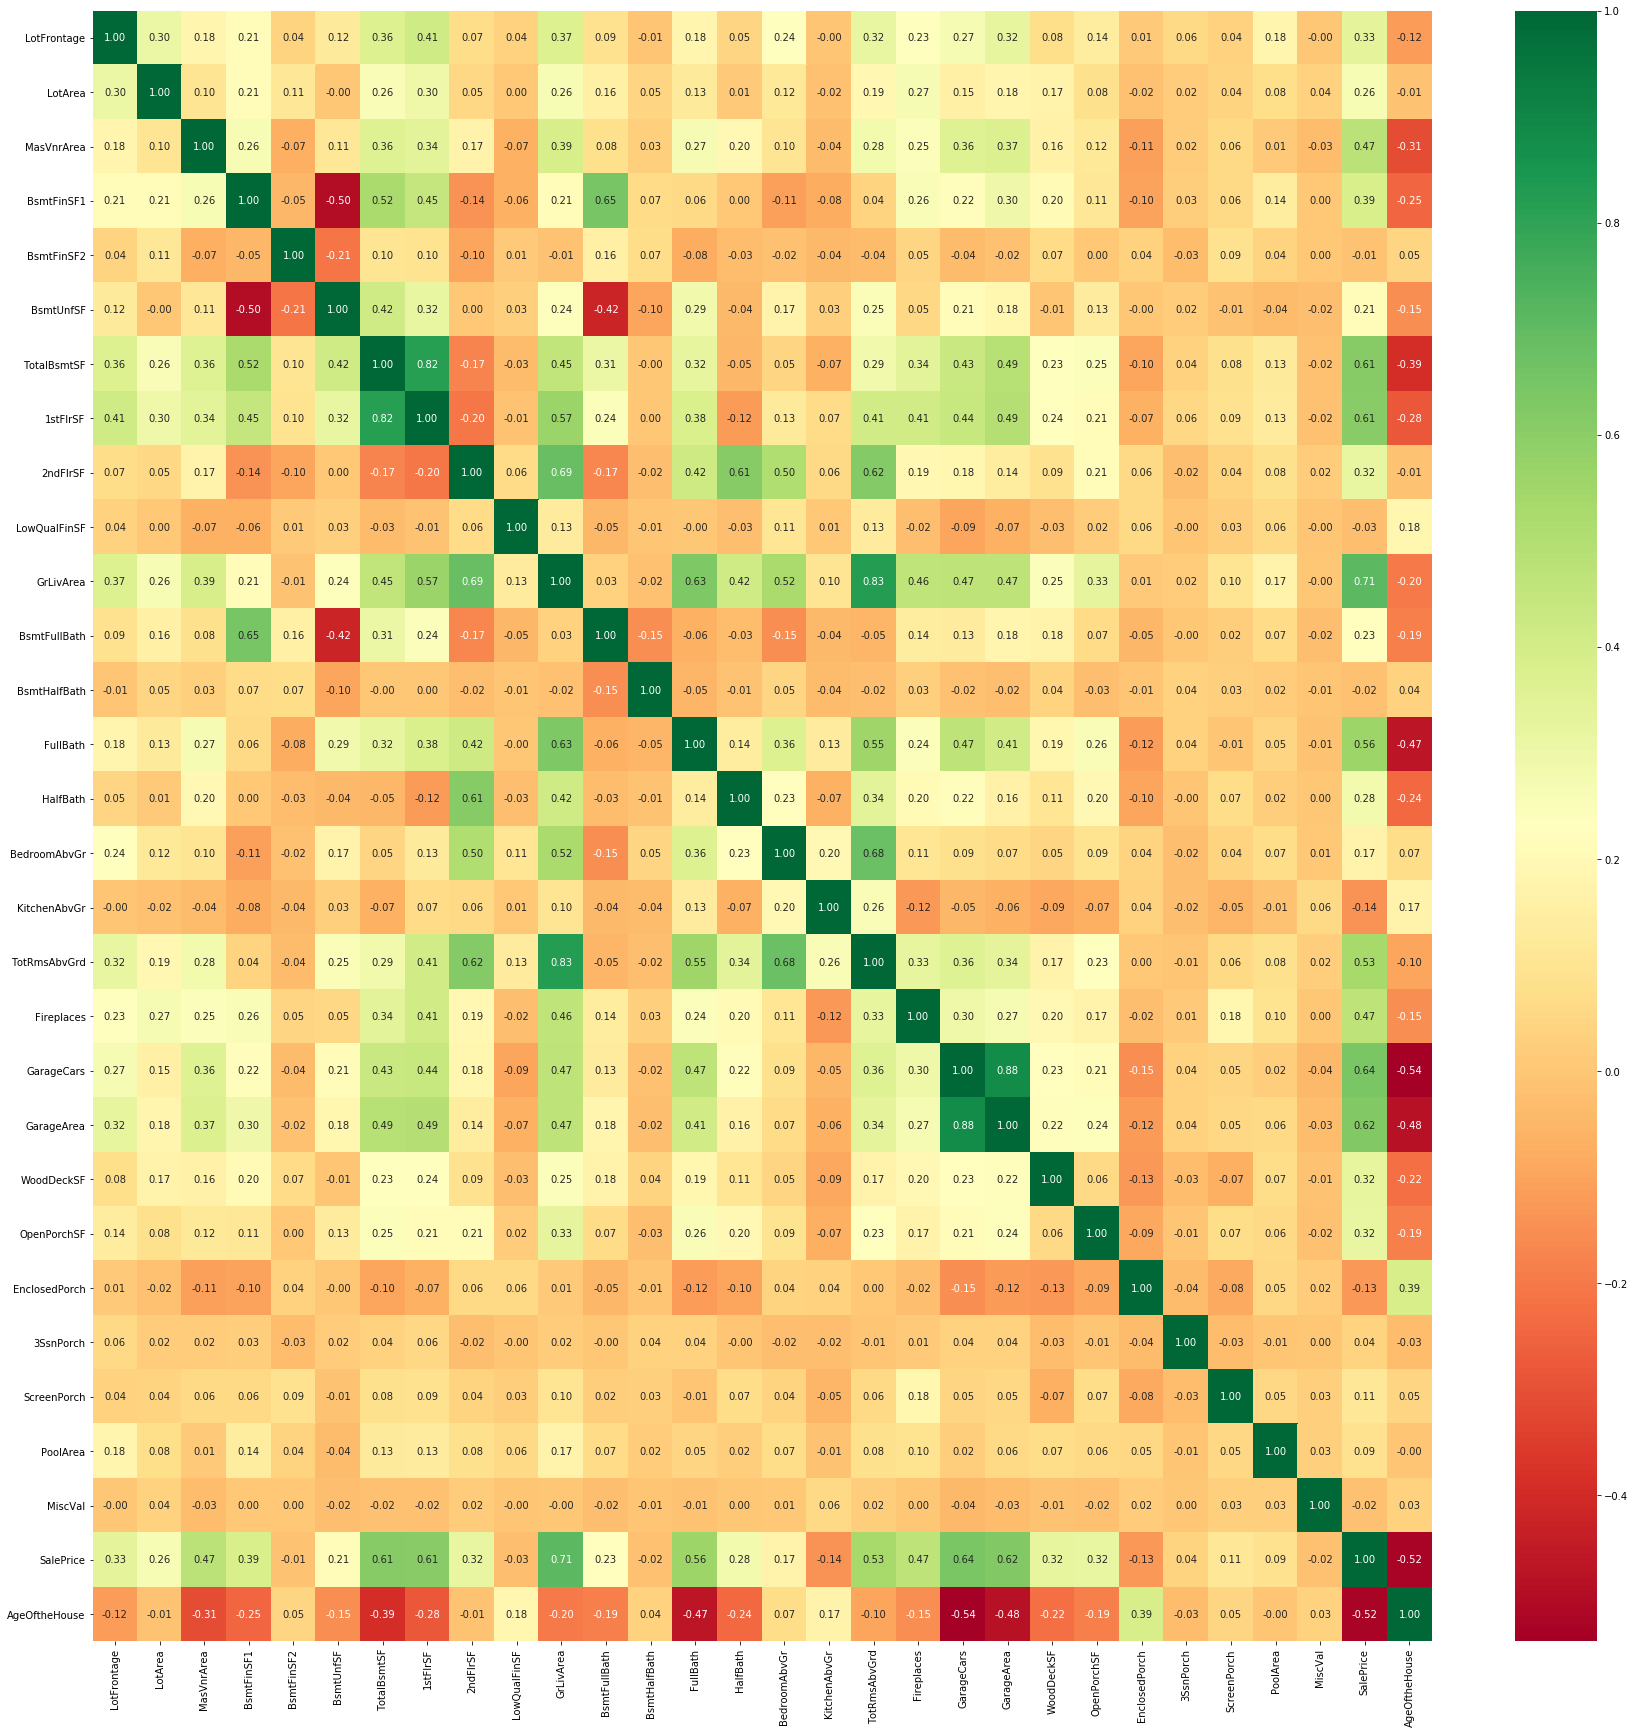

In [81]:
# Checking co-relation among different features

# Setting figure size
plt.figure(figsize = (30,30))

# Heatmap to check correlation with correlation coefficient
sns.heatmap(surp_housing_df.corr(), annot = True, cmap = 'RdYlGn', fmt = '0.2f')

# Showing the plot using matplotlib.pyplot show() function
plt.show()

#### Inference:

- From above heatmap we can notice that few of the predictor variables like, `ToatalBsmtSF and 1stFlrSF`, `GrLivArea and TotRmsAbvGrd`, `GarageArea and GarageCars`, `BsmtFinSF and BsmtFullBath` etc. are having positive linear relationship among each other, i.e., they are positively co-linear with each other

### Data Preparation:

- Variable Transformation
- Create dummies for categorical variable
- Perform train test split
- Scalling

### VariableTransformation

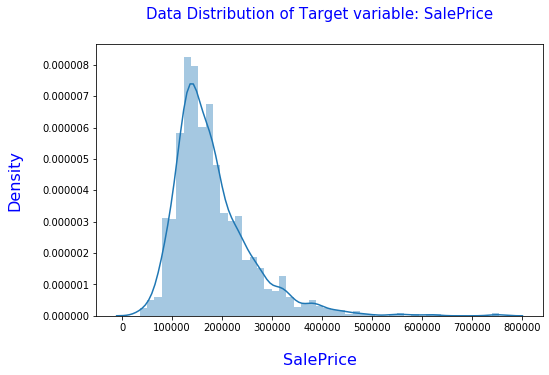

In [82]:
# Checking distribution of Target variable 'SalePrice'

# Setting figuresize
plt.figure(figsize=(8,5))

# Plotting distribution plot using seaborn library
sns.distplot(surp_housing_df['SalePrice'])

# Setting axis label and display parameters
plt.xlabel('SalePrice',fontsize = 16, color = 'blue', labelpad = 20)
plt.ylabel('Density',fontsize = 16, color = 'blue', labelpad = 20)

# Setting title of the plot
plt.title("Data Distribution of Target variable: SalePrice",color='blue',fontsize=15, pad = 25)

# Showing the plot using matplotlib.pyplot show() function 
plt.show()

#### Inference:

- From the above distribution plot, we can see that the distribution of Target variable `SalePrice` is not normal. It is right skwed.

- Hence, we are performing **Log Transformation** on the target column, so that the distribution becomes `Normal`

In [83]:
# Performing Log transformation on Target variable 'SalePrice'

surp_housing_df['SalePrice'] = np.log(surp_housing_df['SalePrice'])

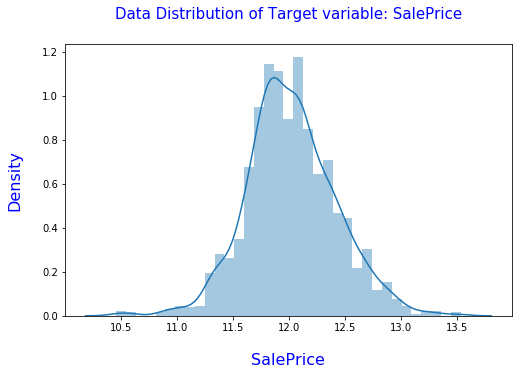

In [84]:
# Checking distribution of Target variable 'SalePrice'

# Setting figuresize
plt.figure(figsize=(8,5))

# Plotting distribution plot using seaborn library
sns.distplot(surp_housing_df['SalePrice'])

# Setting axis label and display parameters
plt.xlabel('SalePrice',fontsize = 16, color = 'blue', labelpad = 20)
plt.ylabel('Density',fontsize = 16, color = 'blue', labelpad = 20)

# Setting title of the plot
plt.title("Data Distribution of Target variable: SalePrice",color='blue',fontsize=15, pad = 25)

# Showing the plot using matplotlib.pyplot show() function 
plt.show()

#### Inference:

- Above distribution plot dipicts that, after log transformation the distribution of Target variable `SalePrice` is become almost `normal`

### Categorical to  Dummy Variable convertion

In [85]:
# Checking all categorical columns to form dummy variables

categorical_cols = surp_housing_df.select_dtypes(include = 'object').columns

# Displaying categorical column names as a list
categorical_cols_list = categorical_cols.to_list()

# Printing the list of categorical columns
print(categorical_cols_list)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'SaleCondition']


In [86]:
# Creating dummy variables and merging with original DataFrame

# Creating dummy variables
dummy_dataFrame = pd.get_dummies(surp_housing_df[categorical_cols_list], drop_first = True)

# Concating the Dummy DataFrame with the original DataFrame
surp_housing_df = pd.concat([surp_housing_df, dummy_dataFrame], axis = 1)

# Displaying the top 5 rows from concatenated DataFrame
surp_housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleCondition,SalePrice,AgeOftheHouse,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Hip,RoofStyle_Others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,RFn,2,548,0,61,0,0,0,0,0,Normal,12.247694,18,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Above Average,Very Good,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,RFn,2,460,298,0,0,0,0,0,0,Normal,12.1

In [87]:
# Dropping the original categorical features for which dummy variables have been created

surp_housing_df.drop(categorical_cols_list, axis = 1, inplace = True)

- Once we `converted all the categorical features into dummy variables` , we have **dropped the original columns**.

In [88]:
# Checking the shape (number of rows & columns) of Original DataFrame after dummy variable creation

surp_housing_df.shape

(1460, 159)

- After dummification, we can see now there are total `159 number of columns` present in dataset

### Reviewing top 10 correlated features with Target

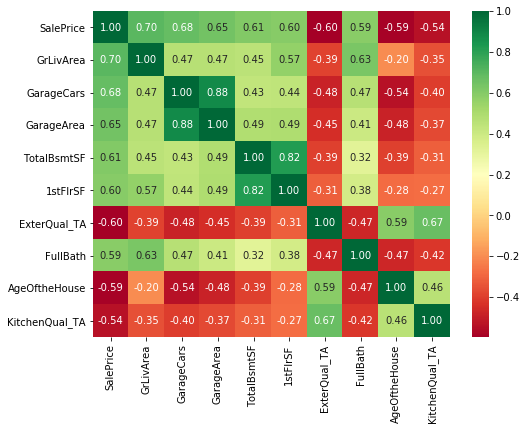

In [89]:
# Checking top 10 correlation matrix with respect to Target variable 'SalePrice'

# Creating correlation matrix of entire DataFrame
corr_matrix = surp_housing_df.corr()

# Choosing number of variables for heatmap
k = 10 

# Taking absolute value of 'SalePrice' column to get the top 10 correlation
corr_matrix['SalePrice'] = abs(corr_matrix['SalePrice'])

# Selecting column name having top 10 correlation w.r.t Target variable 'SalePrice'
top10_cos = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index

# Setting figure size
plt.figure(figsize = (8,6))

# Heatmap to check correlation with correlation coefficient
sns.heatmap(surp_housing_df[top10_cos].corr(), annot = True, cmap = 'RdYlGn', fmt = '0.2f')

# Showing the plot using matplotlib.pyplot show() function
plt.show()

#### Inference:

- Following variables are having good correlation (positive and negative) with Target variable `SalePrice`
    
    - **Positive Corelation with Target:**
        - GrLivArea
        - GarageCars
        - GarageArea
        - TotalBsmtSF
        - 1stFlrSF
        - FullBath
    
    - **Negative Corelation with Target:**
        - ExterQual_TA
        - AgeOftheHouse
        - KitchenQual_TA

### Train - Test Split

In [90]:
# Splitting the DataFrame into Train and Test set for modelling

surp_housing_train_df, surp_housing_test_df = train_test_split(surp_housing_df, train_size = 0.70, random_state = 100)

In [91]:
# Checking shape (no. of rows & no. of columns) of the train dataframe

surp_housing_train_df.shape

(1021, 159)

In [92]:
# Checking shape (no. of rows & no. of columns) of the test dataframe

surp_housing_test_df.shape

(439, 159)

In [93]:
# Seperating independent (X_train) and dependent (y_train) features

y_train = surp_housing_train_df.pop('SalePrice')
X_train = surp_housing_train_df

# Printing the shape of each independent (X_train) and dependent (y_train) features

print(y_train.shape)
print(X_train.shape)

(1021,)
(1021, 158)


In [94]:
# Seperating independent (X_test) and dependent (y_test) features

y_test = surp_housing_test_df.pop('SalePrice')
X_test = surp_housing_test_df

# Printing the shape of each independent (X_test) and dependent (y_test) features

print(y_test.shape)
print(X_test.shape)

(439,)
(439, 158)


- We have splitted the dataset in to train and test for modelling.

### Scalling the DataFrame

#### Scalling Train Dataset

In [95]:
# Perform scalling on train dataset

# Using Standard scaler preprocessing technique to standarized data columns(excluding dummy columns)
scaler = StandardScaler()

# Creating column list to be scalled
col_scale = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'AgeOftheHouse']

# Fitting and transforming numerical columns and storing back into original train dataset
X_train[col_scale] = scaler.fit_transform(X_train[col_scale])

# Checking top 5 rows from train dataset
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeOftheHouse,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Hip,RoofStyle_Others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
318,0.925326,-0.057261,0.809137,1.159065,-0.293313,-0.454262,0.621091,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,1.555150,0.622148,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.715324,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
239,-0.795709,-0.169753,-0.558025,-0.761831,-0.293313,0.172244,-0.712611,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,0.308833,0.622148,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.868511,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,

#### Scalling Test Dataset

In [96]:
# Transforming numerical columns and storing back into original test dataset
X_test[col_scale] = scaler.transform(X_test[col_scale])

# Checking top 5 rows from test dataset
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeOftheHouse,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Hip,RoofStyle_Others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
1436,-0.433386,-0.144614,-0.558025,0.361022,-0.293313,-0.703973,-0.431488,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.937484,-0.927153,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.010600,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0
57,0.880036,0.112107,-0.558025,-0.964030,-0.293313,0.660517,-0.440205,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.308833,-0.927153,0.306009,0.438477,-0.744598,0.347093,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-1.078286,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0

- **Feature Scaling**: We standardized the numeric attributes so they have a common `mean of zero`, we have made the data scale free.

## Model Building

- Use techniques like RFE to perform variable selection
- Perform Lasso and Ridge regularization technique with different values of alpha
- For Ridge choose the best alpha and build model
- For Lasso choose the best alpha and build model
- Check the model performance over the train and test data
- Find out best features that describes the price of the house for both final models created using Ridge and Lasso


### RFE for recursive feature elimination

In [97]:
# Perform Automated Feature Selection using recursive feature elimination(RFE) for Linear regression 

# Creating linear regression object for performing RFE
lnreg_model = LinearRegression()
lnreg_model.fit(X_train, y_train)

# Perform recursive feature elimination (RFE) with 70 features
rfe = RFE(lnreg_model, 80)
rfe = rfe.fit(X_train, y_train)

In [98]:
# Checking RFE selected columns for linear regression modelling

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 51),
 ('LotArea', False, 48),
 ('MasVnrArea', False, 71),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 22),
 ('BsmtHalfBath', False, 68),
 ('FullBath', False, 32),
 ('HalfBath', False, 34),
 ('BedroomAbvGr', False, 75),
 ('KitchenAbvGr', False, 37),
 ('TotRmsAbvGrd', False, 45),
 ('Fireplaces', False, 28),
 ('GarageCars', True, 1),
 ('GarageArea', False, 74),
 ('WoodDeckSF', False, 57),
 ('OpenPorchSF', False, 73),
 ('EnclosedPorch', False, 58),
 ('3SsnPorch', False, 65),
 ('ScreenPorch', False, 60),
 ('PoolArea', False, 63),
 ('MiscVal', False, 78),
 ('AgeOftheHouse', True, 1),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', False, 16),
 ('MSSubClass_1-STORY 1945 & OLDER', True, 1),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', True, 1),
 ('MSSubClass_1-STORY PUD (Planned Unit De

In [99]:
# Checking importent features selected by RFE

rfe_cols = list(X_train.columns[rfe.support_])
rfe_cols

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageCars',
 'AgeOftheHouse',
 'MSSubClass_1-STORY 1945 & OLDER',
 'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
 'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
 'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
 'MSSubClass_2-1/2 STORY ALL AGES',
 'MSSubClass_2-STORY PUD - 1946 & NEWER',
 'MSSubClass_DUPLEX - ALL STYLES AND AGES',
 'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
 'MSZoning_Others',
 'LotShape_IR3',
 'LotConfig_CulDSac',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Gilbert',
 'Neighborhood_MeadowV',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_SWISU',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twn

#### Inference:

- There are total `158` columns in original dataframe. 
- Lasso Regularization will not propely reduce the coefficients from such large features.
- Hence, we have selected `80 features` out of 158 using `recurssive feature elimination technique`, So that Lasso can perform well and reduce the coefficient to generate a good model

In [100]:
# Checking unimportent features not selected by RFE

X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
       'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       'MSSubClass_2-STORY 1945 & OLDER', 'MSSubClass_2-STORY 1946 & NEWER',
       'MSSubClass_SPLIT FOYER', 'MSSubClass_SPLIT OR MULTI-LEVEL',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_Reg',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_OldTown', 'Neighborhood_Sawyer',
       'BldgType_TwnhsE', 'HouseStyle_1Story', 'HouseStyle_2Story',
  

In [101]:
# creating the new X_train dataframe with important features

X_train_rfe = X_train[rfe_cols]

## Ridge Regularization

### Hyperparameter tuning to select optimal Alpha

In [102]:
# Ridge Regularization

# considering different values of alpha for hyperparameter tuning
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Creating object of Ridge regression
ridge = Ridge()

# Selecting k-fold for hyperparameter tuning
kfold = KFold(n_splits = 5, shuffle = True, random_state = 100)

# Performing HyperParameter tuning for choosing optimal value of alpha
ridge_grid_search = GridSearchCV(estimator = ridge
                            , param_grid = params
                            , scoring = 'neg_mean_squared_error'
                            , cv = kfold
                            , verbose = 1
                            , n_jobs = -1
                            , return_train_score = True)


ridge_grid_search.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    2.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [103]:
# Dispalying result of Grid search cross validation

# Creating dataframe for the cross validation
ridge_grid_search_cv_result = pd.DataFrame(ridge_grid_search.cv_results_)

# Displaying the resultant dataframe
ridge_grid_search_cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.01248,0.006240,0.00000,0.000000,0.001,{'alpha': 0.001},-0.014400,-0.035192,-0.019038,-0.022663,-0.015256,-0.021310,0.007538,10,-0.016038,-0.012778,-0.015299,-0.013727,-0.015608,-0.014690,0.001234
1,0.00936,0.007642,0.00000,0.000000,0.01,{'alpha': 0.01},-0.014390,-0.035217,-0.019025,-0.022660,-0.015246,-0.021308,0.007551,9,-0.016038,-0.012778,-0.015299,-0.013727,-0.015608,-0.014690,0.001234
2,0.00312,0.006240,0.00312,0.006240,0.05,{'alpha': 0.05},-0.014344,-0.035328,-0.018973,-0.022649,-0.015206,-0.021300,0.007610,7,-0.016039,-0.012779,-0.015301,-0.013729,-0.015609,-0.014691,0.001234
3,0.00936,0.007642,0.00000,0.000000,0.1,{'alpha': 0.1},-0.014291,-0.035462,-0.018917,-0.022637,-0.015158,-0.021293,0.007680,5,-0.016043,-0.012782,-0.015306,-0.013733,-0.015614,-0.014695,0.001235
4,0.00936,0.007642,0.00312,0.006240,0.2,{'alpha': 0.2},-0.014196,-0.035713,-0.018829,-0.022620,-0.015069,-0.021285,0.007808,2,-0.016056,-0.012791,-0.015323,-0.013747,-0.015629,-0.014709,0.001236
5,0.00624,0.007642,0.00000,0.000000,0.3,{'alpha': 0.3},-0.014115,-0.035944,-0.018759,-0.022610,-0.014991,-0.021284,0.007925,1,-0.016075,-0.012804,-0.015345,-0.013767,-0.015650,-0.014728,0.001238
6,0.00936,0.007642,0.00312,0.006240,0.4,{'alpha': 0.4},-0.014045,-0.036158,-0.018700,-0.022605,-0.014920,-0.021286,0.008032,3,-0.016098,-0.012820,-0.015371,-0.013791,-0.015677,-0.014751,0.001241
7,0.00624,0.007642,0.00000,0.000000,0.5,{'alpha': 0.5},-0.013984,-0.036357,-0.018648,-0.022606,-0.014856,-0.021290,0.008130,4,-0.016124,-0.012836,-0.015399,-0.013818,-0.015706,-0.014777,0.001245
8,0.00624,0.007642,0.00624,0.007642,0.6,{'alpha': 0.6},-0.013931,-0.036544,-0.018599,-0.022610,-0.014797,-0.021296,0.008222,6,-0.016153,-0.012854,-0.015429,-0.013848,-0.015738,-0.014804,0.001249
9,0.01248,0.006240,0.00000,0.000000,0.7,{'alpha': 0.7},-0.013884,-0.036719,-0.018554,-0.022618,-0.014744,-0.021304,0.008307,8,-0.016183,-0.012873,-0.015460,-0.013879,-0.015772,-0.014833,0.001253


In [104]:
# Custom function for Plotting mean test and train scoes with Alpha hyper parameter

# Function Input: CV Result DataFrame
# Function Output: Returns None

def get_opt_alpha_plot(grid_search_cv_result, scale = 'log'):

    # Setting figuresize
    plt.figure(figsize=(8,5))
    
    # Plotting Line plot using matplotlib library for param_alpha vs. mean_train_score
    plt.plot(grid_search_cv_result['param_alpha'].astype('float32'), grid_search_cv_result['mean_train_score'])
    
    # Plotting Line plot using matplotlib library for param_alpha vs. mean_test_score
    plt.plot(grid_search_cv_result['param_alpha'].astype('float32'), grid_search_cv_result['mean_test_score'])
    
    
    # Setting axis label and display parameters
    plt.xlabel('Alpha',fontsize = 16, color = 'blue', labelpad = 20)
    plt.ylabel('Negative Mean Squared Error',fontsize = 16, color = 'blue', labelpad = 20)
    
    # Setting scale
    if scale != '':
        plt.xscale(scale)
    
    # Setting title of the plot
    plt.title("Alpha vs. Negative Mean Squared Error",color='blue',fontsize=15, pad = 25)
    
    # Setting legend
    plt.legend(['train score', 'test score'], loc='upper right')
    
    # Showing the plot using matplotlib.pyplot show() function 
    plt.show()

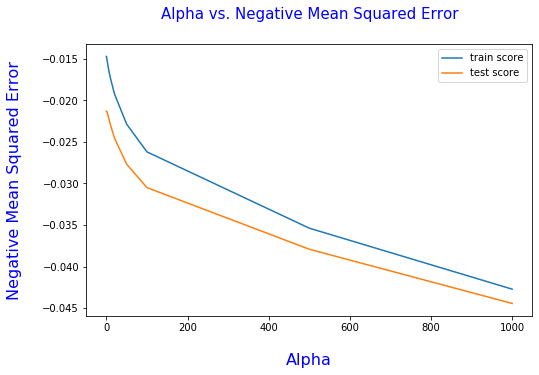

In [105]:
# Calling for Plotting mean test and train scoes with Alpha hyper parameter for Ridge regularization

get_opt_alpha_plot(ridge_grid_search_cv_result,'')

In [106]:
# Displaying best estimator returned from Grid Search Cross Validation for Ridge Regression

# Storing best estimator in a variable
ridge_best = ridge_grid_search.best_estimator_

# Displaying the best estimator variable
ridge_best

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [107]:
# Diaplaying best score for Ridge regularization

ridge_grid_search.best_score_

-0.02128371300502557

In [108]:
# Diaplaying best parameter value (Alpha) for Ridge regularization

ridge_alpha = ridge_grid_search.best_params_
ridge_alpha

{'alpha': 0.3}

#### Inference:

- After hyperparameter tuning, we got best alpha (hyperparameter) for Ridge as **0.3**

#### Model fitment with best alpha

In [109]:
# Fitting model with best estimator received from Ridge regression

ridge_best.fit(X_train_rfe, y_train)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [110]:
# Predicting the target variable on the train dataset

y_train_predicted = ridge_best.predict(X_train_rfe)

In [111]:
# Custom function for calculating evaluation metrics

# Function Input: label, y_true value, y_predicted value
# Function Output: Returns None

def evaluation_metric_func(label, y_true, y_predicted):  
   
    # Calculating Mean Squared error
    mse = mean_squared_error(y_true, y_predicted)
    
    # Calculating Root Mean Squared error
    rmse = np.sqrt(mean_squared_error(y_true, y_predicted))
    
    # Calculating r2 Score
    r2_square = r2_score(y_true, y_predicted)
    
    # Printing evaluation metrics
    print("------------------------------------")
    print(label + ": Evaluation metrics")
    print("------------------------------------")
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square:', r2_square)

In [112]:
# Custom function for calculating evaluation metrics of Train Dataset

print("Train Dataset:")
evaluation_metric_func("Ridge Regression", y_train, y_train_predicted)

Train Dataset:
------------------------------------
Ridge Regression: Evaluation metrics
------------------------------------
MSE: 0.015256828673062094
RMSE: 0.12351853574691571
R2 Square: 0.9029120221348146


#### Inference:

- The calculated **R-squared** value of train dataset is **0.9029** or **90.29%**, which means the model is able to explain 90.29% variance in it.
- This a very **good r2_score** value.
- The calculated **MSE (mean squared error)** value of train dataset is **0.0152568** and **RMSE (Root mean squared error)** value on train dataset is **0.1235**.
- As we know, that the low the value of MSE the better the model is, so our predicted model is a good model.

In [113]:
# Diaplaying the Ridge Regression model parameters

# Creating empty dataframe
ridge_coef_df = pd.DataFrame()

# Getting the model coefficients
ridge_coef = list(ridge_best.coef_)

# Creating 'Features' column of dataframe and populating data
ridge_coef_df['Features'] = X_train_rfe.columns

# Creating 'Coefficient' column of dataframe and populating data 
ridge_coef_df['Coefficient'] = ridge_coef

# Diaplaying the dataframe of Regression model parameters
ridge_coef_df

,Features,Coefficient
0,BsmtFinSF1,-0.007028
1,BsmtFinSF2,0.004143
2,BsmtUnfSF,-0.000214
3,TotalBsmtSF,-0.005788
4,1stFlrSF,0.055071
5,2ndFlrSF,0.046234
6,LowQualFinSF,-0.003847
7,GrLivArea,0.078710
8,GarageCars,0.050398
9,AgeOftheHouse,-0.063976


In [114]:
# Displaying the intercept ofthe Ridge model

print('Intercept of Ridge Regression Model: ', ridge_best.intercept_)

Intercept of Ridge Regression Model:  12.21894632407217


In [115]:
# Displaying top 10 best features that describes the price of the house

ridge_coef_df.reindex(ridge_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

,Features,Coefficient
43,OverallQual_Poor,-0.483466
69,HeatingQC_Po,-0.261457
40,OverallQual_Excellent,0.244520
50,OverallCond_Fair,-0.222608
24,Neighborhood_Crawfor,0.217257
46,OverallQual_Very Poor,-0.192689
51,OverallCond_Very Poor,-0.192689
28,Neighborhood_NoRidge,0.188619
22,Neighborhood_ClearCr,0.181965
29,Neighborhood_NridgHt,0.168415


#### Inference:

- Above dataframe is showing the **top 10 best features** with there coefficients that predict the price of the house.
- Following features are having **positive** impact on housing sales price.
    - OverallQual_Excellent
    - Neighborhood_Crawfor
    - Neighborhood_NoRidge
    - Neighborhood_ClearCr
    - Neighborhood_NridgHt
    
    
- Following features are having **negative** impact on housing sales price.
    - OverallQual_Poor
    - HeatingQC_Po
    - OverallCond_Fair
    - OverallQual_Very Poor
    - OverallCond_Very Poor

In [116]:
# creating the new X_train dataframe with important features

X_test_rfe = X_test[rfe_cols]

In [117]:
# Predicting the target variable on the test dataset

y_test_predicted = ridge_best.predict(X_test_rfe)

In [118]:
# Custom function for calculating evaluation metrics of Test Dataset

print("Test Dataset:")
evaluation_metric_func("Ridge Regression", y_test, y_test_predicted)

Test Dataset:
------------------------------------
Ridge Regression: Evaluation metrics
------------------------------------
MSE: 0.021362169298106772
RMSE: 0.14615802851060483
R2 Square: 0.8703868072450047


#### Inference:

- The calculated **R-squared** value of test dataset is **0.8703868** or **87.04%**, which means the model is able to explain 87.04% variance in it.
- This a very **good r2_score** value.
- The calculated **MSE (mean squared error)** value of test dataset is **0.021362** and **RMSE (Root mean squared error)** value on test dataset is **0.146158**.
- As we know, that the low the value of MSE the better the model is, so our predicted model is a good model.

### Visualising the fit on the test set

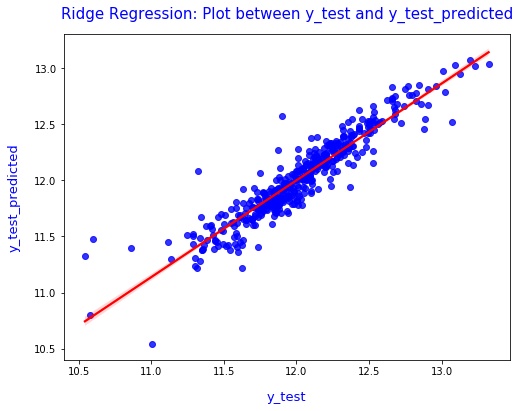

In [119]:
# Plotting y_test and y_test_predicted to understand the variance in test dataset

# Setting the figure size
plt.figure(figsize=(8,6))

#Ploting the regression plot
sns.regplot(y_test,y_test_predicted,ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Setting the format of the plot
plt.title('Ridge Regression: Plot between y_test and y_test_predicted', fontsize=15,color='blue',pad=15)             
plt.xlabel('y_test', fontsize=13,color='blue',labelpad=14)                          
plt.ylabel('y_test_predicted', fontsize=13,color='blue',labelpad=14)     

# Displaying the plot usong matplotlib.pyplot
plt.show()

#### Inference:

- The above regression plot between **y_test** and **y_test_pred** shows that the predicted values are equally distributed along the regression line/ best fit line.

- Which means, our predicted model will able to **generalize** the output based on unknown dataset.

## Lasso Regularization

### Hyperparameter tuning to select optimal Alpha

In [120]:
# Lasso Regularization

# considering different values of alpha for hyper parameter tuning
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Creating object of Ridge regression
lasso = Lasso()

# Selecting k-fold for hyper parameter tuning
kfold = KFold(n_splits = 5, shuffle = True, random_state = 100)

# Performing Hyper Parameter tuning for choosing optimal value of alpha
lasso_grid_search = GridSearchCV(estimator = lasso
                            , param_grid = params
                            , scoring = 'neg_mean_squared_error'
                            , cv = kfold
                            , verbose = 1
                            , n_jobs = -1
                            , return_train_score = True)


lasso_grid_search.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [121]:
# Dispalying result of Grid search cross validation

# Creating dataframe for the cross validation
lasso_grid_search_cv_result = pd.DataFrame(lasso_grid_search.cv_results_)

# Displaying the resultant dataframe
lasso_grid_search_cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.037602,4.716240e-03,0.00460,3.720473e-03,0.001,{'alpha': 0.001},-0.016000,-0.047982,-0.018498,-0.024776,-0.015619,-0.024575,0.012154,1,-0.019405,-0.015314,-0.018621,-0.017067,-0.019140,-0.017909,0.001530
1,0.009000,6.324851e-04,0.00300,1.095627e-03,0.01,{'alpha': 0.01},-0.027983,-0.068532,-0.029850,-0.042227,-0.027370,-0.039192,0.015638,2,-0.037799,-0.028997,-0.037367,-0.034121,-0.038034,-0.035263,0.003438
2,0.008200,7.483155e-04,0.00300,2.000070e-03,0.05,{'alpha': 0.05},-0.035448,-0.065288,-0.038545,-0.049675,-0.037340,-0.045259,0.011178,3,-0.045533,-0.036475,-0.045448,-0.041694,-0.045909,-0.043012,0.003610
3,0.007201,3.999949e-04,0.00240,4.899598e-04,0.1,{'alpha': 0.1},-0.047757,-0.071220,-0.055442,-0.063084,-0.054877,-0.058476,0.008009,4,-0.058866,-0.051115,-0.059086,-0.055470,-0.059560,-0.056820,0.003200
4,0.007400,4.899987e-04,0.00220,3.999710e-04,0.2,{'alpha': 0.2},-0.095299,-0.119442,-0.113547,-0.118336,-0.116108,-0.112546,0.008857,5,-0.111919,-0.108433,-0.112305,-0.110571,-0.113558,-0.111357,0.001745
5,0.020001,1.939177e-02,0.00240,8.000612e-04,0.3,{'alpha': 0.3},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464
6,0.006600,4.897846e-04,0.00200,1.168008e-07,0.4,{'alpha': 0.4},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464
7,0.006400,4.897846e-04,0.00220,4.000664e-04,0.5,{'alpha': 0.5},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464
8,0.006600,8.000135e-04,0.00220,4.000664e-04,0.6,{'alpha': 0.6},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464
9,0.007200,7.483410e-04,0.00700,5.253825e-03,0.7,{'alpha': 0.7},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464


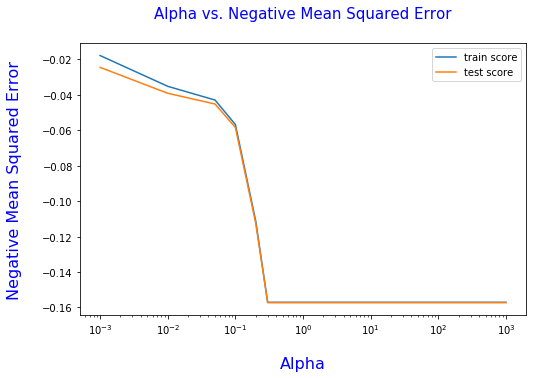

In [122]:
# Calling for Plotting mean test and train scoes with Alpha hyper parameter for Lasso regularization

get_opt_alpha_plot(lasso_grid_search_cv_result)

In [123]:
# Displaying best estimator returned from Grid Search Cross Validation for Lasso Regression

# Storing best estimator in a variable
lasso_best = lasso_grid_search.best_estimator_

# Displaying the best estimator variable
lasso_best

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [124]:
# Diaplaying best score for Lasso regularization

lasso_grid_search.best_score_

-0.024574883111132297

In [125]:
# Diaplaying best parameter value (Alpha) for Ridge regularization

lasso_alpha = lasso_grid_search.best_params_
lasso_alpha

{'alpha': 0.001}

#### Inference:

- After hyperparameter tuning, we got best alpha (hyperparameter) for Lasso as **0.001**

#### Model fitment with best alpha

In [126]:
# Fitting model with best estimator received from Ridge regression

lasso_best.fit(X_train_rfe, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [127]:
# Predicting the target variable on the train dataset

y_train_predicted = lasso_best.predict(X_train_rfe)

In [128]:
# Custom function for calculating evaluation metrics of Train Dataset

print("Train Dataset:")
evaluation_metric_func("Lasso Regression", y_train, y_train_predicted)

Train Dataset:
------------------------------------
Lasso Regression: Evaluation metrics
------------------------------------
MSE: 0.018552541023282743
RMSE: 0.1362077127892644
R2 Square: 0.8819395084778187


#### Inference:

- The calculated **R-squared** value of train dataset is **0.8819** or **88.19%**, which means the model is able to explain 88.19% variance in it.
- This a very **good r2_score** value.
- The calculated **MSE (mean squared error)** value of train dataset is **0.01855** and **RMSE (Root mean squared error)** value on train dataset is **0.1362**.
- As we know, that the low the value of MSE the better the model is, so our predicted model is a good model.

In [129]:
# Diaplaying the Ridge Regression model parameters

# Creating empty dataframe
lasso_coef_df = pd.DataFrame()

# Getting the model coefficients
lasso_coef = list(lasso_best.coef_)

# Creating 'Features' column of dataframe and populating data
lasso_coef_df['Features'] = X_train_rfe.columns

# Creating 'Coefficient' column of dataframe and populating data 
lasso_coef_df['Coefficient'] = lasso_coef

# Diaplaying the dataframe of Regression model parameters
lasso_coef_df

,Features,Coefficient
0,BsmtFinSF1,0.002351
1,BsmtFinSF2,0.005216
2,BsmtUnfSF,-0.000000
3,TotalBsmtSF,0.011277
4,1stFlrSF,0.004518
5,2ndFlrSF,0.000000
6,LowQualFinSF,-0.007514
7,GrLivArea,0.154402
8,GarageCars,0.062050
9,AgeOftheHouse,-0.083704


#### Inference:

- Above dataframe is showing value of coefficients with respective predictor features.
- We can see that, **coefficients** of some of the features like  `MSSubClass_2-1/2 STORY ALL AGES`, `MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES`, `2ndFlrSF`, `BsmtUnfSF`, `MSSubClass_2-1/2 STORY ALL AGES`, `Neighborhood_CollgCr`, `BldgType_2fmCon` etc. has become **zero** after Lasso Regularization

In [130]:
# Displaying the intercept ofthe Lasso model

print('Intercept of Lasso Regression Model: ', lasso_best.intercept_)

Intercept of Lasso Regression Model:  12.054305083824815


In [131]:
# Displaying top 10 best features that describes the price of the house

top10_lasso_df = lasso_coef_df.reindex(lasso_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

# Displaying dataframe with top 10 feature returned from lasso model
top10_lasso_df

,Features,Coefficient
40,OverallQual_Excellent,0.252778
50,OverallCond_Fair,-0.216573
24,Neighborhood_Crawfor,0.175040
45,OverallQual_Very Good,0.155333
7,GrLivArea,0.154402
62,BsmtQual_No Basement,-0.145713
29,Neighborhood_NridgHt,0.105996
15,MSSubClass_2-STORY PUD - 1946 & NEWER,-0.094426
48,OverallCond_Below Average,-0.091559
22,Neighborhood_ClearCr,0.089338


#### Inference:

- Above dataframe is showing the **top 10 best features** with there coefficients that predict the price of the house.
- Following features are having **positive** impact on housing sales price.
    - OverallQual_Excellent
    - Neighborhood_Crawfor
    - OverallQual_Very Good
    - GrLivArea
    - Neighborhood_NridgHt
    - Neighborhood_ClearCr
    
    
- Following features are having **negative** impact on housing sales price.
    - OverallCond_Fair
    - BsmtQual_No Basement
    - MSSubClass_2-STORY PUD - 1946 & NEWER
    - OverallCond_Below Average

In [132]:
# Selecting top 5 best features returned from Lasso Model

top5_lasso_features = top10_lasso_df['Features'].iloc[:5].to_list()

In [133]:
# Predicting the target variable on the test dataset

y_test_predicted = lasso_best.predict(X_test_rfe)

In [134]:
# Custom function for calculating evaluation metrics of Test Dataset

print("Test Dataset:")
evaluation_metric_func("Lasso Regression", y_test, y_test_predicted)

Test Dataset:
------------------------------------
Lasso Regression: Evaluation metrics
------------------------------------
MSE: 0.022156752401838172
RMSE: 0.14885144407038237
R2 Square: 0.8655657400796524


#### Inference:

- The calculated **R-squared** value of test dataset is **0.8655657** or **86.56%**, which means the model is able to explain 86.56% variance in it.
- This a very **good r2_score** value.
- The calculated **MSE (mean squared error)** value of test dataset is **0.02215675** and **RMSE (Root mean squared error)** value on test dataset is **0.14885**.
- As we know, that the low the value of MSE the better the model is, so our predicted model is a good model.

### Visualising the fit on the test set

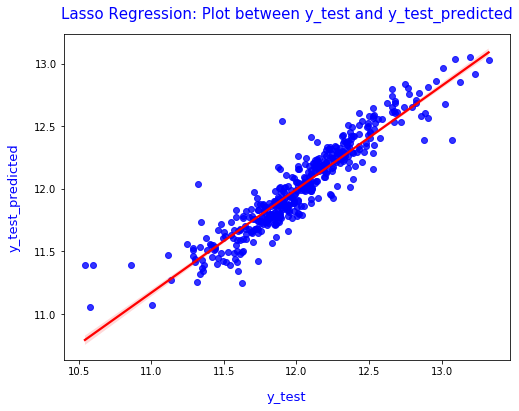

In [135]:
# Plotting y_test and y_test_predicted to understand the variance in test dataset

# Setting the figure size
plt.figure(figsize=(8,6))

#Ploting the regression plot
sns.regplot(y_test,y_test_predicted,ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Setting the format of the plot
plt.title('Lasso Regression: Plot between y_test and y_test_predicted', fontsize=15,color='blue',pad=15)             
plt.xlabel('y_test', fontsize=13,color='blue',labelpad=14)                          
plt.ylabel('y_test_predicted', fontsize=13,color='blue',labelpad=14)     

# Displaying the plot usong matplotlib.pyplot
plt.show()

#### Inference:

- The above regression plot between **y_test** and **y_test_pred** shows that the predicted values are equally distributed along the regression line/ best fit line.

- Which means, our predicted model will able to **generalize** the output based on unknown dataset.

## Conclusion

#### Ridge Regularization (alpha = 0.3)

- Top features which explain the Sale price of the house along with their coefficients value which describe how well these features helps in predicting the Sale price of the house

    - OverallQual_Poor =	**-0.483466**
    - HeatingQC_Po     =	**-0.261457**
    - OverallQual_Excellent =	**0.244520**
    - OverallCond_Fair =  **-0.222608**
    - Neighborhood_Crawfor =	**0.217257**
    - OverallQual_Very Poor =	**-0.192689**
    - OverallCond_Very Poor =	**-0.192689**
    - Neighborhood_NoRidge  = **0.188619**
    - Neighborhood_ClearCr  =	**0.181965**
    - Neighborhood_NridgHt  = **0.168415**
 
 

#### Lasso Regularization  (alpha = 0.001)

- Top features which explain the Sale price of the house along with their coefficients value which describe how well these features helps in predicting the Sale price of the house

    - OverallQual_Excellent = **0.252778**
    - OverallCond_Fair	    = **-0.216573**
    - Neighborhood_Crawfor   =  **0.175040**
    - OverallQual_Very Good	=  **0.155333**
    - GrLivArea	            = **0.154402**
    - BsmtQual_No Basement   = **-0.145713**
    - Neighborhood_NridgHt	=  **0.105996**
    - MSSubClass_2-STORY PUD - 1946 & NEWER = **-0.094426**
    - OverallCond_Below Average	= **-0.091559**
    - Neighborhood_ClearCr	= **0.089338**

# Subjective Questions:

## Question 1: 


**What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose to double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?**

In [136]:
# The optimal value of alpha for ridge and lasso regression

alpha_ridge = list(ridge_alpha.values())[0]
alpha_lasso = list(lasso_alpha.values())[0]

print('Optimal value of alpha for Ridge Regression: {0}'.format(alpha_ridge))
print('Optimal value of alpha for Lasso Regression: {0}'.format(alpha_lasso))

Optimal value of alpha for Ridge Regression: 0.3
Optimal value of alpha for Lasso Regression: 0.001


In [137]:
# Doubling the value of alpha in both Ridge and Lasso Model

new_alpha_ridge = alpha_ridge * 2
new_alpha_lasso = alpha_lasso * 2

print('After choosing double value of alpha for Ridge Regression, new alpha is: {0}'.format(new_alpha_ridge))
print('After choosing double value of alpha for Lasso Regression, new alpha is: {0}'.format(new_alpha_lasso))

After choosing double value of alpha for Ridge Regression, new alpha is: 0.6
After choosing double value of alpha for Lasso Regression, new alpha is: 0.002


### Ridge Regression with new alpha

In [138]:
# Fitting Ridge Regression model with new alpha

ridge_new = Ridge(alpha = new_alpha_ridge)

# Fitting the model
ridge_new.fit(X_train_rfe,y_train)

# Perform prediction with new model
y_train_predicted_new = ridge_new.predict(X_train_rfe)

In [139]:
# Custom function for calculating evaluation metrics of Train Dataset

print("Train Dataset:")
evaluation_metric_func("Ridge Regression", y_train, y_train_predicted_new)

Train Dataset:
------------------------------------
Ridge Regression: Evaluation metrics
------------------------------------
MSE: 0.015315795613068091
RMSE: 0.12375700227893406
R2 Square: 0.9025367815727843


In [140]:
# Diaplaying the Ridge Regression model parameters

# Creating empty dataframe
ridge_coef_df = pd.DataFrame()

# Getting the model coefficients
ridge_coef = list(ridge_new.coef_)

# Creating 'Features' column of dataframe and populating data
ridge_coef_df['Features'] = X_train_rfe.columns

# Creating 'Coefficient' column of dataframe and populating data 
ridge_coef_df['Coefficient'] = ridge_coef

# Displaying top 10 best features that describes the price of the house
ridge_coef_df.reindex(ridge_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

,Features,Coefficient
43,OverallQual_Poor,-0.422018
40,OverallQual_Excellent,0.241445
50,OverallCond_Fair,-0.222134
24,Neighborhood_Crawfor,0.214584
69,HeatingQC_Po,-0.211291
28,Neighborhood_NoRidge,0.181875
22,Neighborhood_ClearCr,0.176439
46,OverallQual_Very Poor,-0.167754
51,OverallCond_Very Poor,-0.167754
29,Neighborhood_NridgHt,0.164764


In [141]:
# Displaying the intercept ofthe Ridge model

print('Intercept of Ridge Regression Model: ', ridge_new.intercept_)

Intercept of Ridge Regression Model:  12.209478123768974


In [142]:
# Predicting the target variable on the test dataset

y_test_predicted_new = ridge_new.predict(X_test_rfe)

In [143]:
# Custom function for calculating evaluation metrics of Test Dataset

print("Test Dataset:")
evaluation_metric_func("Ridge Regression", y_test, y_test_predicted_new)

Test Dataset:
------------------------------------
Ridge Regression: Evaluation metrics
------------------------------------
MSE: 0.02115576451921567
RMSE: 0.14545021319756005
R2 Square: 0.8716391511441018


### Lasso Regression with new alpha

In [144]:
# Fitting Ridge Regression model with new alpha

lasso_new = Lasso(alpha = new_alpha_lasso)

# Fitting the model
lasso_new.fit(X_train_rfe,y_train)

# Perform prediction with new model
y_train_predicted_new = lasso_new.predict(X_train_rfe)

In [145]:
# Custom function for calculating evaluation metrics of Train Dataset

print("Train Dataset:")
evaluation_metric_func("Lasso Regression", y_train, y_train_predicted_new)

Train Dataset:
------------------------------------
Lasso Regression: Evaluation metrics
------------------------------------
MSE: 0.021367158330540134
RMSE: 0.1461750947683638
R2 Square: 0.8640284793457645


In [146]:
# Diaplaying the Ridge Regression model parameters

# Creating empty dataframe
lasso_coef_df = pd.DataFrame()

# Getting the model coefficients
lasso_coef = list(lasso_new.coef_)

# Creating 'Features' column of dataframe and populating data
lasso_coef_df['Features'] = X_train_rfe.columns

# Creating 'Coefficient' column of dataframe and populating data 
lasso_coef_df['Coefficient'] = lasso_coef

# Displaying the dataframe with model parameters
lasso_coef_df

,Features,Coefficient
0,BsmtFinSF1,0.008114
1,BsmtFinSF2,0.002790
2,BsmtUnfSF,-0.000000
3,TotalBsmtSF,0.024802
4,1stFlrSF,0.000000
5,2ndFlrSF,0.000000
6,LowQualFinSF,-0.007517
7,GrLivArea,0.158397
8,GarageCars,0.067704
9,AgeOftheHouse,-0.090071


In [147]:
# Displaying top 10 best features that describes the price of the house

lasso_coef_df.reindex(lasso_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

,Features,Coefficient
40,OverallQual_Excellent,0.221404
50,OverallCond_Fair,-0.164484
7,GrLivArea,0.158397
45,OverallQual_Very Good,0.146679
24,Neighborhood_Crawfor,0.141567
9,AgeOftheHouse,-0.090071
29,Neighborhood_NridgHt,0.083825
15,MSSubClass_2-STORY PUD - 1946 & NEWER,-0.078999
64,BsmtExposure_Gd,0.077735
48,OverallCond_Below Average,-0.075194


In [148]:
# Displaying the intercept ofthe Ridge model

print('Intercept of Lasso Regression Model: ', lasso_new.intercept_)

Intercept of Lasso Regression Model:  12.034970400320233


In [149]:
# Predicting the target variable on the test dataset

y_test_predicted_new = lasso_new.predict(X_test_rfe)

In [150]:
# Custom function for calculating evaluation metrics of Test Dataset

print("Test Dataset:")
evaluation_metric_func("Lasso Regression", y_test, y_test_predicted_new)

Test Dataset:
------------------------------------
Lasso Regression: Evaluation metrics
------------------------------------
MSE: 0.024209052259580997
RMSE: 0.15559258420497102
R2 Square: 0.8531135806879446


### NOTE:

- All explanations are given in Subject Question answer pdf document, which is submitted along with this Jupyter Notebook.

## Question 3:


**After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?**

In [151]:
# Dropping the five most important predictor variables in the lasso model 

X_train_rfe_new = X_train_rfe.drop(top5_lasso_features, axis = 1)

### Lasso Regularization after dropping top 5 best features

In [152]:
# Lasso Regularization

# considering different values of alpha for hyper parameter tuning
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Creating object of Ridge regression
lasso = Lasso()

# Selecting k-fold for hyper parameter tuning
kfold = KFold(n_splits = 5, shuffle = True, random_state = 100)

# Performing Hyper Parameter tuning for choosing optimal value of alpha
lasso_grid_search = GridSearchCV(estimator = lasso
                            , param_grid = params
                            , scoring = 'neg_mean_squared_error'
                            , cv = kfold
                            , verbose = 1
                            , n_jobs = -1
                            , return_train_score = True)


lasso_grid_search.fit(X_train_rfe_new,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [153]:
# Dispalying result of Grid search cross validation

# Creating dataframe for the cross validation
lasso_grid_search_cv_result = pd.DataFrame(lasso_grid_search.cv_results_)

# Displaying the resultant dataframe
lasso_grid_search_cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013321,5.797325e-03,0.002000,0.000632,0.001,{'alpha': 0.001},-0.018373,-0.053483,-0.022178,-0.030761,-0.018196,-0.028598,0.013251,1,-0.022931,-0.019195,-0.022199,-0.019888,-0.022725,-0.021388,0.001542
1,0.009601,3.720399e-03,0.002400,0.000490,0.01,{'alpha': 0.01},-0.028563,-0.068410,-0.030733,-0.042531,-0.027473,-0.039542,0.015402,2,-0.038058,-0.029145,-0.037785,-0.034237,-0.038562,-0.035557,0.003553
2,0.008400,2.332522e-03,0.002600,0.000490,0.05,{'alpha': 0.05},-0.040982,-0.064478,-0.042782,-0.052356,-0.040486,-0.048217,0.009200,3,-0.048381,-0.039393,-0.048079,-0.044538,-0.048580,-0.045794,0.003528
3,0.009601,3.720379e-03,0.004200,0.003919,0.1,{'alpha': 0.1},-0.064982,-0.076080,-0.068211,-0.076024,-0.065483,-0.070156,0.004938,4,-0.070183,-0.062621,-0.069914,-0.067409,-0.070332,-0.068092,0.002936
4,0.006400,8.000016e-04,0.002000,0.001095,0.2,{'alpha': 0.2},-0.107170,-0.129933,-0.126443,-0.130187,-0.126097,-0.123966,0.008569,5,-0.121135,-0.122137,-0.124302,-0.120051,-0.125584,-0.122642,0.002032
5,0.006240,7.642391e-03,0.003120,0.006240,0.3,{'alpha': 0.3},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464
6,0.006240,7.642391e-03,0.006240,0.007642,0.4,{'alpha': 0.4},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464
7,0.006240,7.642450e-03,0.003120,0.006240,0.5,{'alpha': 0.5},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464
8,0.006240,7.642391e-03,0.003120,0.006240,0.6,{'alpha': 0.6},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464
9,0.006240,7.642391e-03,0.003120,0.006240,0.7,{'alpha': 0.7},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464


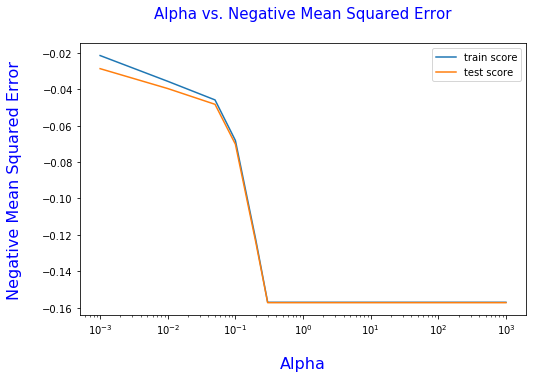

In [154]:
# Calling for Plotting mean test and train scoes with Alpha hyper parameter for Lasso regularization

get_opt_alpha_plot(lasso_grid_search_cv_result)

In [155]:
# Displaying best estimator returned from Grid Search Cross Validation for Lasso Regression

# Storing best estimator in a variable
lasso_best = lasso_grid_search.best_estimator_

# Displaying the best estimator variable
lasso_best

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [156]:
# Diaplaying best score for Lasso regularization

lasso_grid_search.best_score_

-0.02859813201726007

In [157]:
# Diaplaying best parameter value (Alpha) for Ridge regularization

lasso_alpha = lasso_grid_search.best_params_
lasso_alpha

{'alpha': 0.001}

In [158]:
# Fitting model with best estimator received from Ridge regression

lasso_best.fit(X_train_rfe_new, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [159]:
# Predicting the target variable on the train dataset

y_train_predicted = lasso_best.predict(X_train_rfe_new)

In [160]:
# Custom function for calculating evaluation metrics of Train Dataset

print("Train Dataset:")
evaluation_metric_func("Lasso Regression", y_train, y_train_predicted)

Train Dataset:
------------------------------------
Lasso Regression: Evaluation metrics
------------------------------------
MSE: 0.02200315161007578
RMSE: 0.14833459343685065
R2 Square: 0.8599812882309436


In [161]:
# Diaplaying the Ridge Regression model parameters

# Creating empty dataframe
lasso_coef_df = pd.DataFrame()

# Getting the model coefficients
lasso_coef = list(lasso_best.coef_)

# Creating 'Features' column of dataframe and populating data
lasso_coef_df['Features'] = X_train_rfe_new.columns

# Creating 'Coefficient' column of dataframe and populating data 
lasso_coef_df['Coefficient'] = lasso_coef

# Diaplaying the dataframe of Regression model parameters
lasso_coef_df

,Features,Coefficient
0,BsmtFinSF1,0.001929
1,BsmtFinSF2,0.003546
2,BsmtUnfSF,-0.000000
3,TotalBsmtSF,0.001741
4,1stFlrSF,0.136783
5,2ndFlrSF,0.131410
6,LowQualFinSF,0.006033
7,GarageCars,0.066493
8,AgeOftheHouse,-0.075327
9,MSSubClass_1-STORY 1945 & OLDER,-0.092549


In [162]:
# Displaying the intercept ofthe Lasso model

print('Intercept of Lasso Regression Model: ', lasso_best.intercept_)

Intercept of Lasso Regression Model:  12.159603679856765


In [163]:
# Displaying top 10 best features that describes the price of the house

lasso_coef_df.reindex(lasso_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

,Features,Coefficient
57,BsmtQual_No Basement,-0.207192
27,Neighborhood_NridgHt,0.159540
65,KitchenQual_Fa,-0.140506
4,1stFlrSF,0.136783
5,2ndFlrSF,0.131410
67,KitchenQual_TA,-0.128336
14,MSSubClass_2-STORY PUD - 1946 & NEWER,-0.124593
30,Neighborhood_Somerst,0.112369
31,Neighborhood_StoneBr,0.098187
17,MSZoning_Others,-0.096654


In [164]:
# Predicting the target variable on the test dataset

# Dropping the five most important predictor variables in the lasso model from X_test
X_test_rfe_new = X_test_rfe.drop(top5_lasso_features, axis = 1)

# Perform prediction with rest predictor variables
y_test_predicted = lasso_best.predict(X_test_rfe_new)

In [165]:
# Custom function for calculating evaluation metrics of Test Dataset

print("Test Dataset:")
evaluation_metric_func("Lasso Regression", y_test, y_test_predicted)

Test Dataset:
------------------------------------
Lasso Regression: Evaluation metrics
------------------------------------
MSE: 0.02501440189669037
RMSE: 0.15815941924744908
R2 Square: 0.84822718847313


### NOTE:

- All explanations are given in Subject Question answer pdf document, which is submitted along with this Jupyter Notebook.

                                                   **END**